Warning!. In the test setsi there are four test sets with different sizes.

# Initialization

In [1]:
rm(list = ls())

library(data.table)
library(tidyverse)
library(rJava)
library(RNetLogo)

library(lhs)  # For maximin Latin hypercube sampling
library(ggplot2)
library(plotly)  # For beautiful plotting
library(caret)
library(randomForest)
library(factoextra)
library(e1071)
library(TSrepr)  # for evaluating predictive power

require(gridExtra)

options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_fram

In [2]:
folder.path = "C:/Users/paslanpatir/Desktop/TEZ_v2/"
data.path = paste0(folder.path,"data/")

nl.model.1 = "Segregation"
model.type.1 = ifelse(nl.model.1 == "Segregation", "basic", "dummy")
output.folder.1 = paste0("outputs/outputs_50_100/outputs_SampleRef_Basic")
outputs.path.1 = paste0(folder.path,output.folder.1,"/")

nl.model.2 = ifelse(nl.model.1 == "Segregation", "Segregation_Dummy", "Segregation")
model.type.2 = ifelse(model.type.1 == "basic", "dummy", "basic")
output.folder.2 = paste0("outputs/outputs_50_100/outputs_SampleRef_Dummy")
outputs.path.2 = paste0(folder.path,output.folder.2,"/")

# OneShot

In [3]:
#### OneShot ####

## Model.1

In [4]:
#### Model.1 ####
one_shot_path.1 = paste0(outputs.path.1,"oneshot/")

obb_error_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_predictedLabels_oneshot_all",".csv"))

In [5]:
performance_molten_oneshot.1 <- melt(data = performance_table_oneshot.1
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot.1, c("variable","value"),c("errortype","errorvalue"))

In [6]:
test_ave_performance_molten_oneshot.1 = performance_molten_oneshot.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [7]:
####################TEST###############
head(test_ave_performance_molten_oneshot.1[seed == 0 & rep == 10])
mean(performance_molten_oneshot.1[seed == 0 & rep == 10 & errortype == "rmse"]$errorvalue)

iter,seed,rep,errortype,errorvalue
<int>,<int>,<int>,<fct>,<dbl>
1,0,10,mae,2.614757
1,0,10,rmse,4.726669
1,0,10,mape,3.777191


[1] 4.726669

### Replications on Each Seed

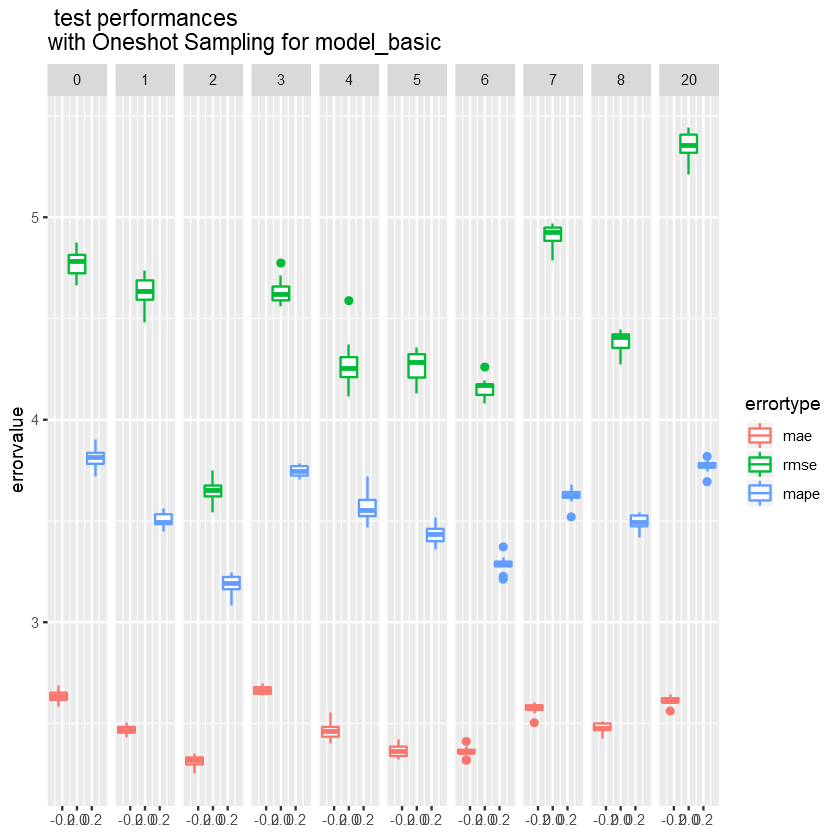

In [8]:
#### Replications on Each Seed ####
one_shot_ind_bxp.1 = ggplot(data = test_ave_performance_molten_oneshot.1, aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot() +
                    facet_grid(~ seed,scales = "free") +
                    ggtitle(paste0(" test performances","\n","with Oneshot Sampling for model_",model.type.1)) 
one_shot_ind_bxp.1

In [9]:
performance_table_oneshot.1[, .(mean_rmse = mean(rmse)),.(seed,size)][order(size,mean_rmse)]

seed,size,mean_rmse
<int>,<int>,<dbl>
2,100,3.230207
6,100,3.637097
4,100,4.200631
8,100,4.236523
5,100,4.447541
1,100,4.612667
7,100,4.849274
3,100,5.070896
0,100,5.131273


### Overall BoxPlot

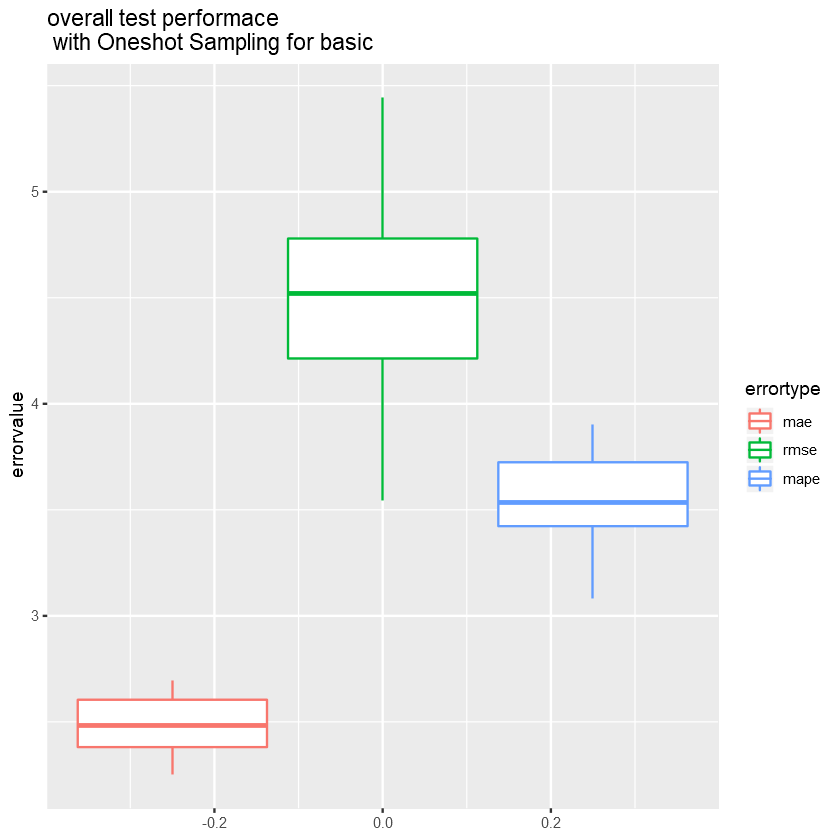

In [10]:
one_shot_bxp.1 = ggplot(data = test_ave_performance_molten_oneshot.1, aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                 #   facet_wrap(~ size) +
                  #  labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.1$rmse))) +
                    ggtitle(paste0("overall test performace","\n"," with Oneshot Sampling for ",model.type.1))
                    
one_shot_bxp.1

In [11]:
boxplot.stats(performance_table_oneshot.1[size == 300]$rmse)

$stats
[1] 3.633655 4.468304 4.895677 5.216347 6.205174

$n
[1] 100

$conf
[1] 4.777486 5.013868

$out
numeric(0)

### Test Set Size Comparison

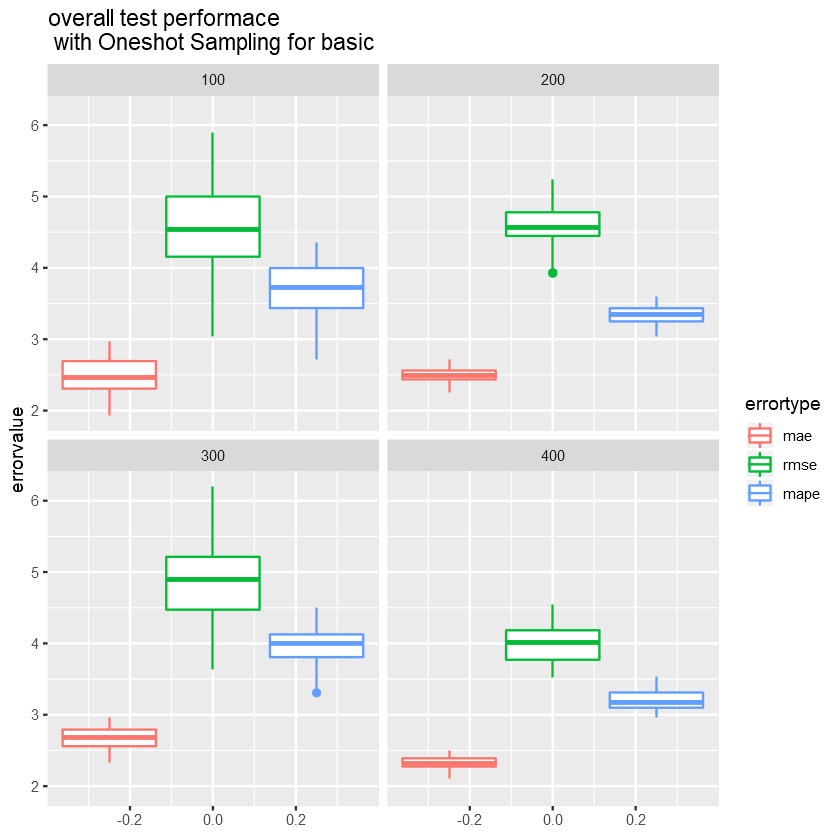

In [12]:
ggplot(data = performance_molten_oneshot.1, aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) +
                  #  labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.1$rmse))) +
                    ggtitle(paste0("overall test performace","\n"," with Oneshot Sampling for ",model.type.1))


## Model.2

In [13]:
#### Model.2 ####
one_shot_path.2 = paste0(outputs.path.2,"oneshot/")

obb_error_oneshot.2 = fread(paste0(one_shot_path.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot.2 = fread(paste0(one_shot_path.2,model.type.2,"_performance_table_oneshot",".csv"))
predictedLabels_oneshot.2 = fread(paste0(one_shot_path.2,model.type.2,"_predictedLabels_oneshot_all",".csv"))

In [14]:
performance_molten_oneshot.2 <- melt(data = performance_table_oneshot.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot.2, c("variable","value"),c("errortype","errorvalue"))

In [15]:
test_ave_performance_molten_oneshot.2 = performance_molten_oneshot.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Seed

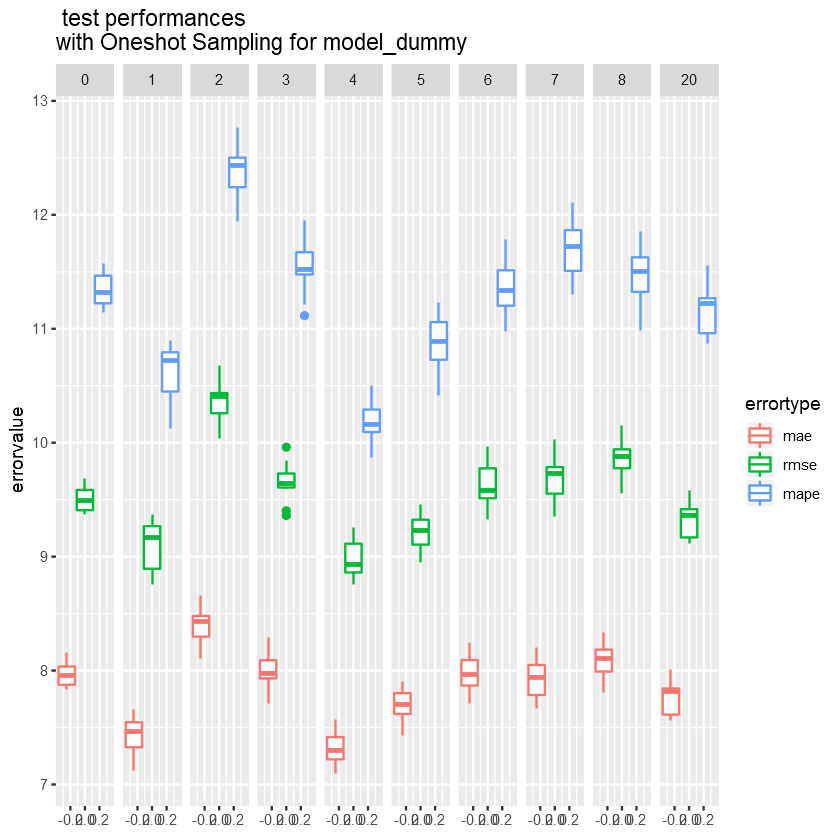

In [16]:
#### Replications on Each Seed ####
one_shot_ind_bxp.2 = ggplot(data = test_ave_performance_molten_oneshot.2, aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot() +
                    facet_grid( ~ seed, scales = "free") +
                    ggtitle(paste0(" test performances","\n","with Oneshot Sampling for model_",model.type.2)) 
one_shot_ind_bxp.2

In [17]:
performance_table_oneshot.2[, .(mean_rmse = mean(rmse)),.(size,seed)][order(size,mean_rmse)]

size,seed,mean_rmse
<int>,<int>,<dbl>
100,4,8.713023
100,1,8.785479
100,0,8.836471
100,5,8.942406
100,8,9.249912
100,20,9.380934
100,7,9.560046
100,6,9.694974
100,3,9.841771


### Overall BoxPlot

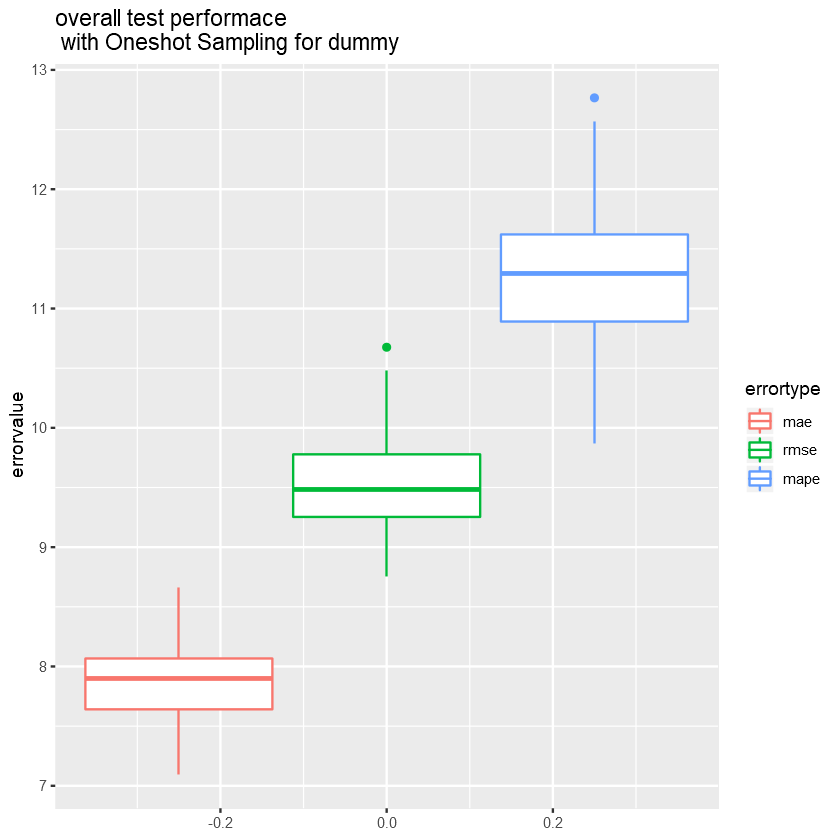

In [18]:
one_shot_bxp.2 = ggplot(data = test_ave_performance_molten_oneshot.2, aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    #facet_wrap(~ size) +
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +
                    ggtitle(paste0("overall test performace","\n"," with Oneshot Sampling for ",model.type.2))
                    
one_shot_bxp.2

In [109]:
boxplot.stats(performance_table_oneshot.2[size == 300]$rmse)

$stats
[1]  9.217292  9.680728  9.994216 10.247871 11.067777

$n
[1] 100

$conf
[1]  9.904607 10.083824

$out
numeric(0)

### Test Set Size Comparison

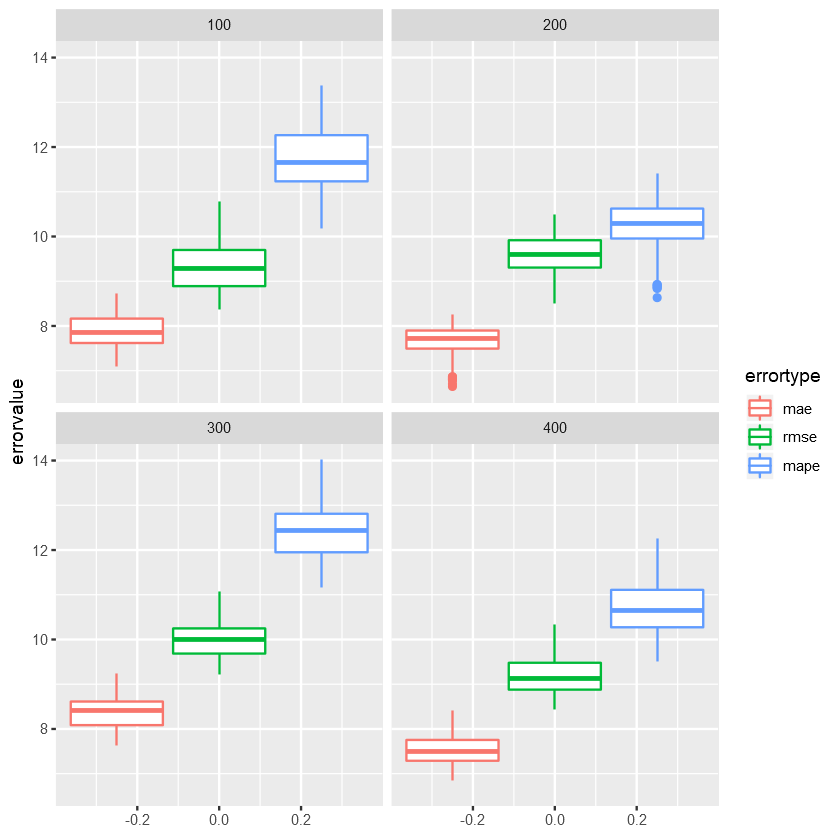

In [20]:
ggplot(data = performance_molten_oneshot.2, aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

# Random Sampling Replications

In [21]:
#### Random Sampling Replications ####

## Model.1

In [22]:
#### Model.1 ####
Rd_path.1 = paste0(outputs.path.1,"Rd/")

obb_error_Rd.1              = fread(paste0(Rd_path.1,model.type.1,"_obb_error_Rd",".csv"))
performance_table_Rd.1      = fread(paste0(Rd_path.1,model.type.1,"_performance_table_Rd",".csv"))
predictedLabels_Rd.1        = fread(paste0(Rd_path.1,model.type.1,"_predictedLabels_table_Rd",".csv"))
FinalTrainData_Rd.1         = fread(paste0(Rd_path.1,model.type.1,"_FinalTrainData_Rd",".csv"))
train_candidates_Rd.1       = fread(paste0(Rd_path.1,model.type.1,"_train_candidates_table_Rd",".csv"))

In [23]:
performance_molten_Rd_seq.1 <- melt(data = performance_table_Rd.1
                             , id.vars = c('iter',"seed","rep","size")
                             , measure.vars = c("mae","rmse","mape"))
performance_molten_Rd_seq.1[, iter := iter - 1]
setnames(performance_molten_Rd_seq.1, c("variable","value"),c("errortype","errorvalue"))

In [24]:
test_ave_performance_molten_Rd_seq.1 = performance_molten_Rd_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [25]:
#predictedLabels_molten_Rd_seq.1 <- melt(data = predictedLabels_Rd.1
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Rd_seq.1, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Rd_seq.1[,iter := as.numeric(str_sub(iter, 13))]

### Replications on Each Iteration

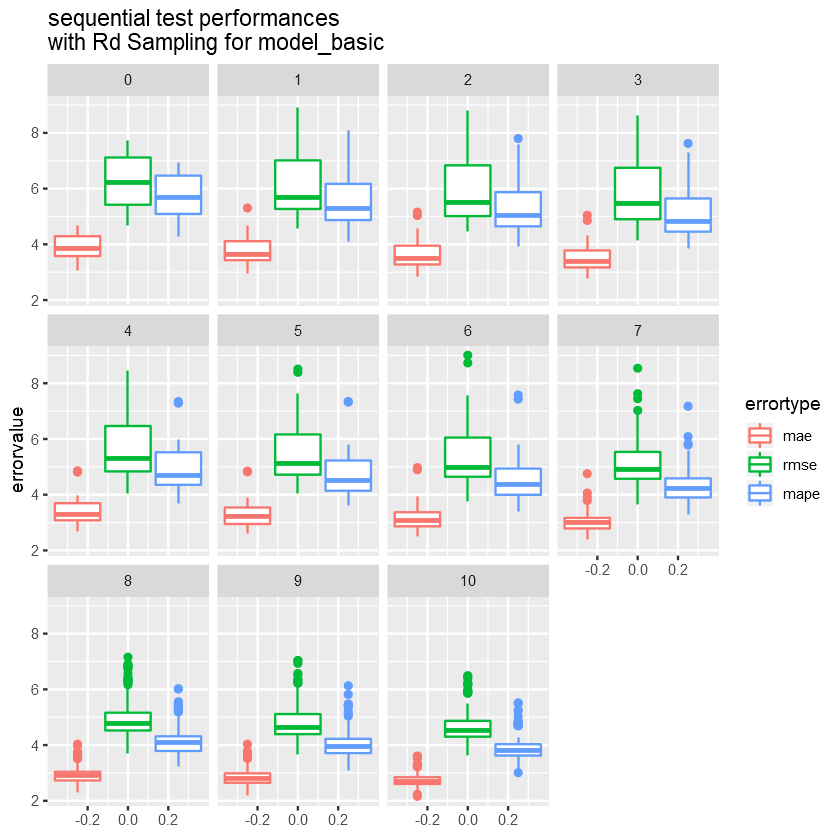

In [26]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Rd_seq_ind_bxp.1 = ggplot(test_ave_performance_molten_Rd_seq.1, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Rd Sampling for model_",model.type.1))
Rd_seq_ind_bxp.1

### Overall BoxPlot

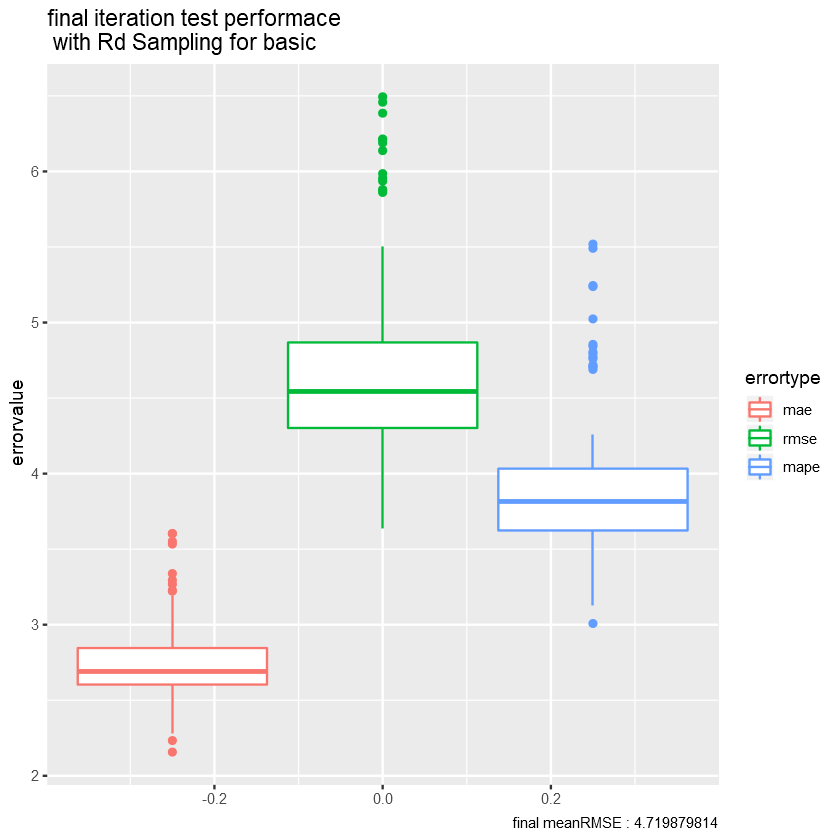

In [27]:
#### Overall BoxPlot ####
Rd_seq_bxp.1 = ggplot(data = test_ave_performance_molten_Rd_seq.1[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Rd_seq.1[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Rd Sampling for ",model.type.1))
                    
Rd_seq_bxp.1

In [28]:
boxplot.stats(test_ave_performance_molten_Rd_seq.1[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1] 3.635057 4.300550 4.541078 4.883453 5.503885

$n
[1] 100

$conf
[1] 4.448980 4.633177

$out
 [1] 6.494256 6.385672 6.458383 5.875016 6.189078 6.138046 5.985660 5.880594
 [9] 5.955406 6.215131 6.210500 5.936494 5.861123

In [29]:
####################TEST###############
mean(test_ave_performance_molten_Rd_seq.1[#seed == 0 & rep == 10 & 
                                          errortype == "rmse" & iter == 10]$errorvalue)
mean(performance_molten_Rd_seq.1[seed == 0 & rep == 10 & errortype == "rmse" & iter == 10]$errorvalue)

[1] 4.71988

[1] 4.185495

### Test Set Size Comparison

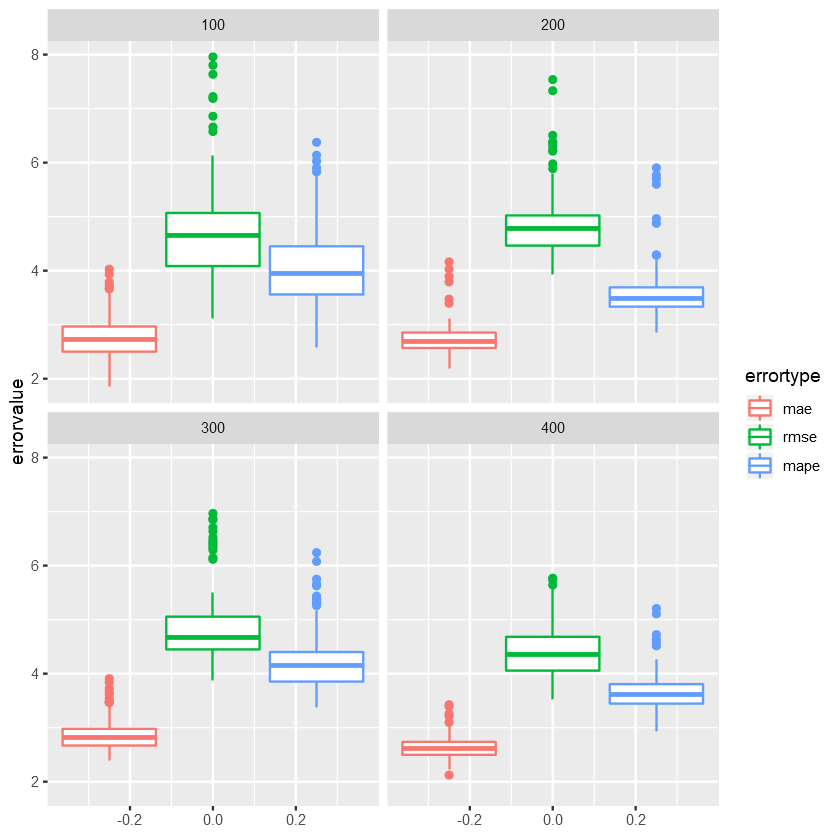

In [30]:
ggplot(data = performance_molten_Rd_seq.1[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.2

In [31]:
#### Model.2 ####
Rd_path.2 = paste0(outputs.path.2,"Rd/")

obb_error_Rd.2              = fread(paste0(Rd_path.2,model.type.2,"_obb_error_Rd",".csv"))
performance_table_Rd.2      = fread(paste0(Rd_path.2,model.type.2,"_performance_table_Rd",".csv"))
predictedLabels_Rd.2        = fread(paste0(Rd_path.2,model.type.2,"_predictedLabels_table_Rd",".csv"))
FinalTrainData_Rd.2         = fread(paste0(Rd_path.2,model.type.2,"_FinalTrainData_Rd",".csv"))
train_candidates_Rd.2       = fread(paste0(Rd_path.2,model.type.2,"_train_candidates_table_Rd",".csv"))

In [32]:
performance_molten_Rd_seq.2 <- melt(data = performance_table_Rd.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Rd_seq.2[, iter := iter - 1]
setnames(performance_molten_Rd_seq.2, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Rd_seq.2 <- melt(data = predictedLabels_Rd.2
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Rd_seq.2, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Rd_seq.2[,iter := as.numeric(str_sub(iter, 13))]
#

In [33]:
test_ave_performance_molten_Rd_seq.2 = performance_molten_Rd_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration 

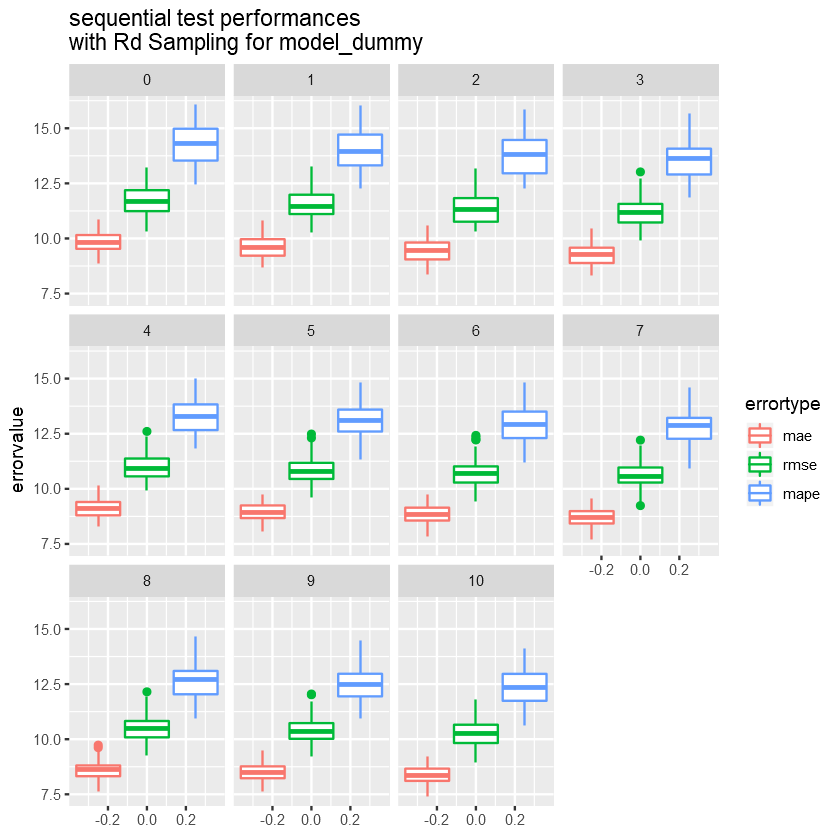

In [34]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Rd_seq_ind_bxp.2 = ggplot(test_ave_performance_molten_Rd_seq.2, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Rd Sampling for model_",model.type.2))
Rd_seq_ind_bxp.2


### Overall BoxPlot 

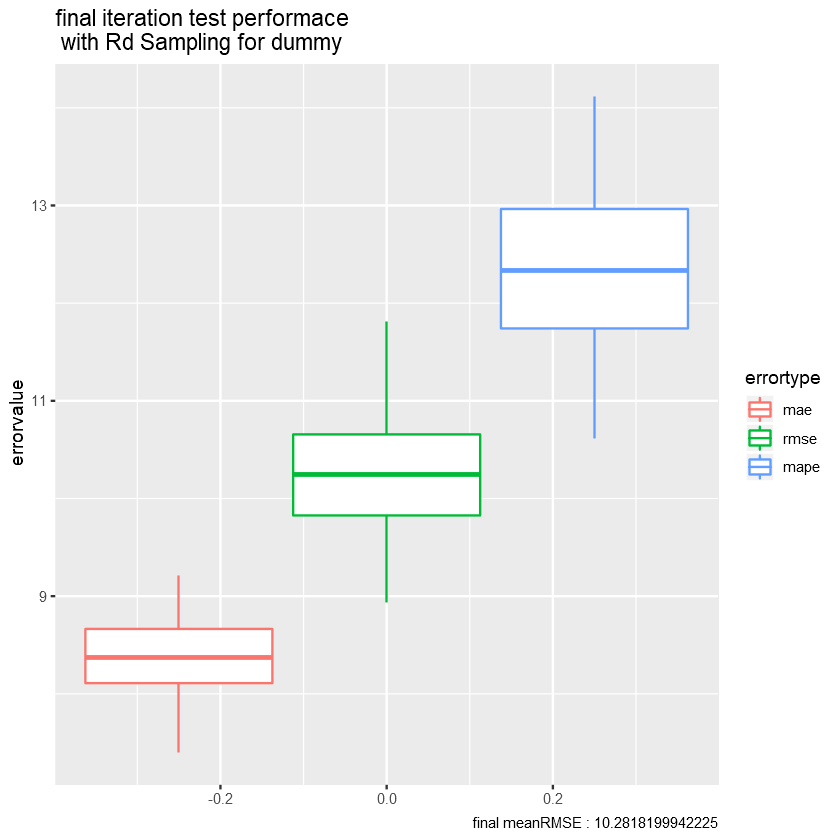

In [35]:
#### Overall BoxPlot ####
Rd_seq_bxp.2 = ggplot(data = test_ave_performance_molten_Rd_seq.2[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Rd_seq.2[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Rd Sampling for ",model.type.2))
                    
Rd_seq_bxp.2


In [36]:
boxplot.stats(test_ave_performance_molten_Rd_seq.2[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1]  8.938370  9.822022 10.243365 10.661853 11.810970

$n
[1] 100

$conf
[1] 10.11067 10.37606

$out
numeric(0)

### Test Set Size Comparison

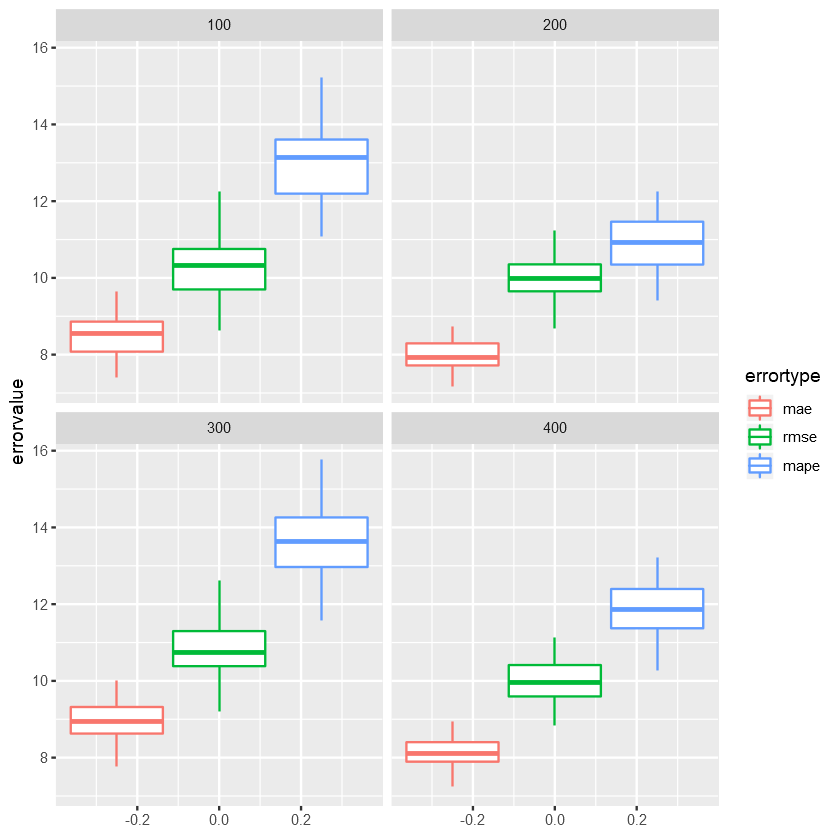

In [37]:
ggplot(data = performance_molten_Rd_seq.2[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.1 vs Model.2

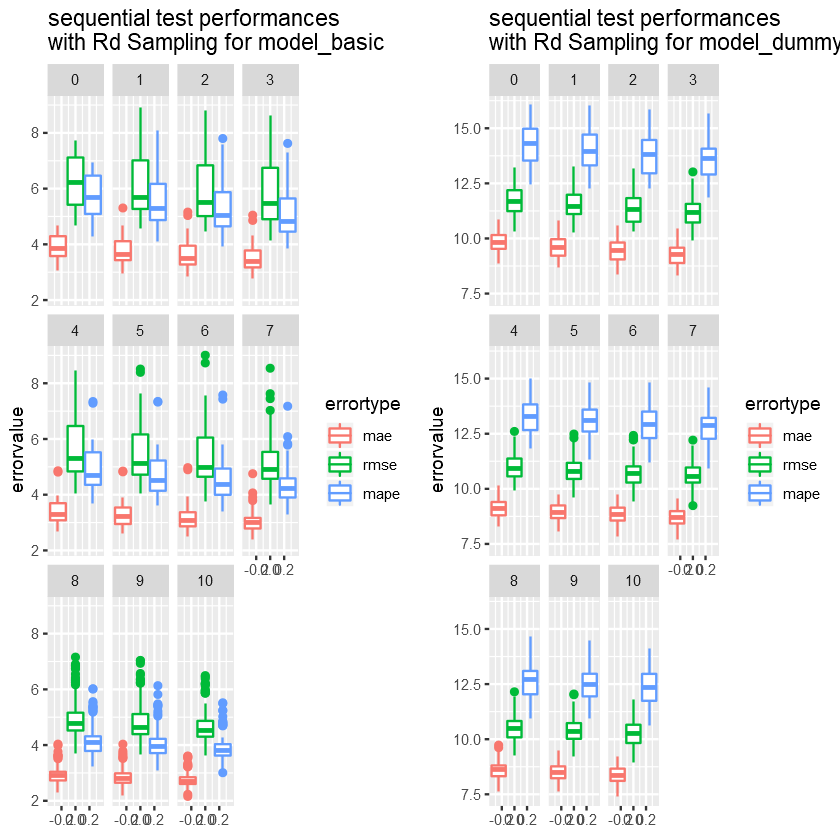

In [38]:
grid.arrange(Rd_seq_ind_bxp.1,Rd_seq_ind_bxp.2, ncol = 2)

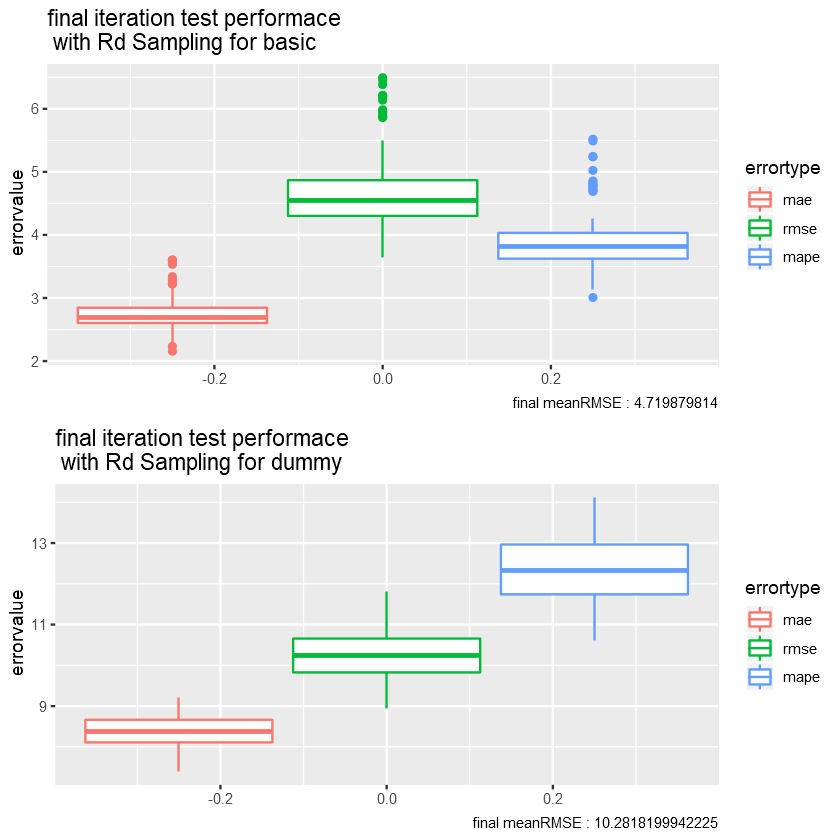

In [39]:
grid.arrange(Rd_seq_bxp.1,Rd_seq_bxp.2)

# Adaptive Sampling Replications

In [40]:
#### Adaptive Sampling ####

## Model.1

In [41]:
#### Model.1 ####
Ad_path.1 = paste0(outputs.path.1,"Ad_sd/")

obb_error_Ad.1              = fread(paste0(Ad_path.1,model.type.1,"_obb_error_Ad",".csv"))
performance_table_Ad.1      = fread(paste0(Ad_path.1,model.type.1,"_performance_table_Ad",".csv"))
predictedLabels_Ad.1        = fread(paste0(Ad_path.1,model.type.1,"_predictedLabels_table_Ad",".csv"))
FinalTrainData_Ad.1         = fread(paste0(Ad_path.1,model.type.1,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.1       = fread(paste0(Ad_path.1,model.type.1,"_train_candidates_table_Ad",".csv"))

In [42]:
performance_molten_Ad_seq.1 <- melt(data = performance_table_Ad.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_seq.1, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Ad_seq.1 <- melt(data = predictedLabels_Ad.1
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Ad_seq.1, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Ad_seq.1[,iter := as.numeric(str_sub(iter, 13))]
#

In [43]:
test_ave_performance_molten_Ad_seq.1 = performance_molten_Ad_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration

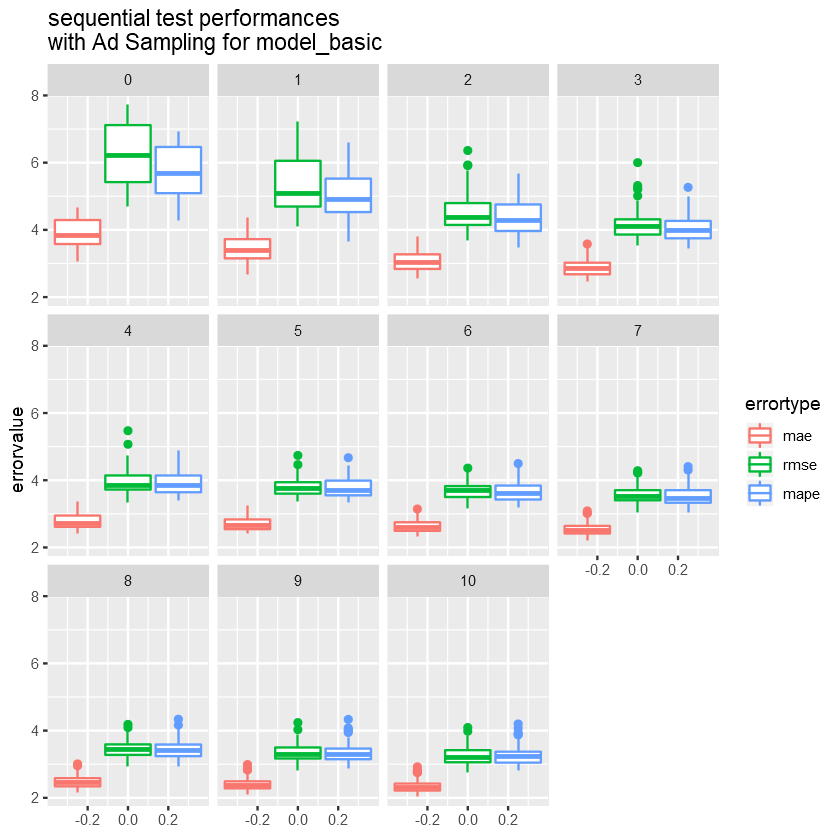

In [44]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Ad_seq_ind_bxp.1 = ggplot(test_ave_performance_molten_Ad_seq.1, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Ad Sampling for model_",model.type.1))
Ad_seq_ind_bxp.1

### Overall BoxPlot

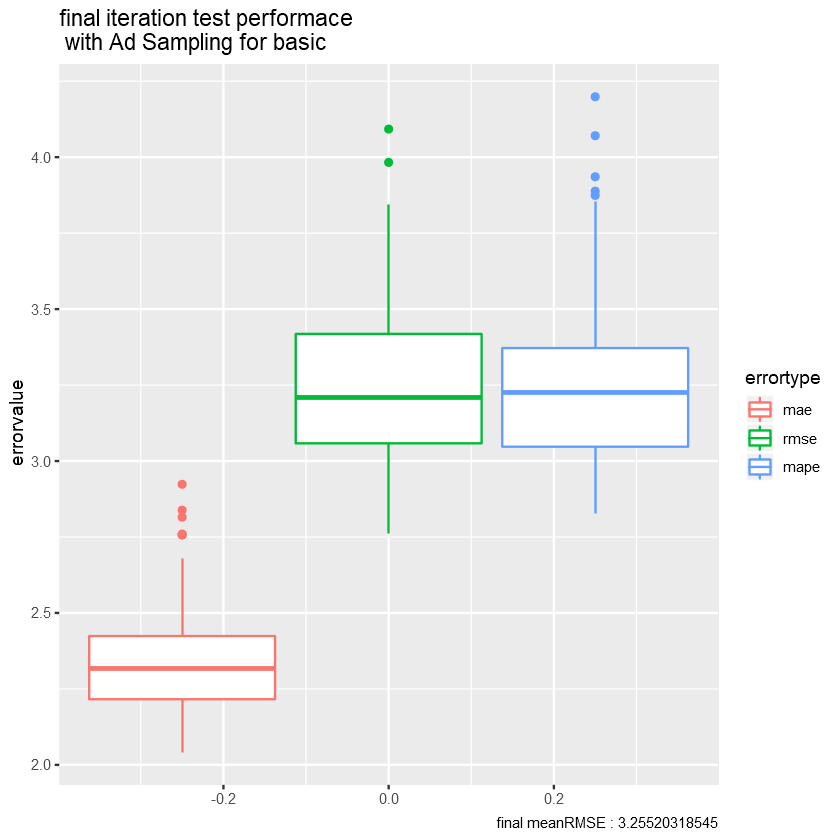

In [45]:
#### Overall BoxPlot ####
Ad_seq_bxp.1 = ggplot(data = test_ave_performance_molten_Ad_seq.1[iter ==10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Ad_seq.1[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Ad Sampling for ",model.type.1))
                    
Ad_seq_bxp.1

In [46]:
boxplot.stats(test_ave_performance_molten_Ad_seq.1[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1] 2.761419 3.057476 3.210522 3.426247 3.844890

$n
[1] 100

$conf
[1] 3.152257 3.268788

$out
[1] 3.982939 4.092634

### Test Set Size Comparison

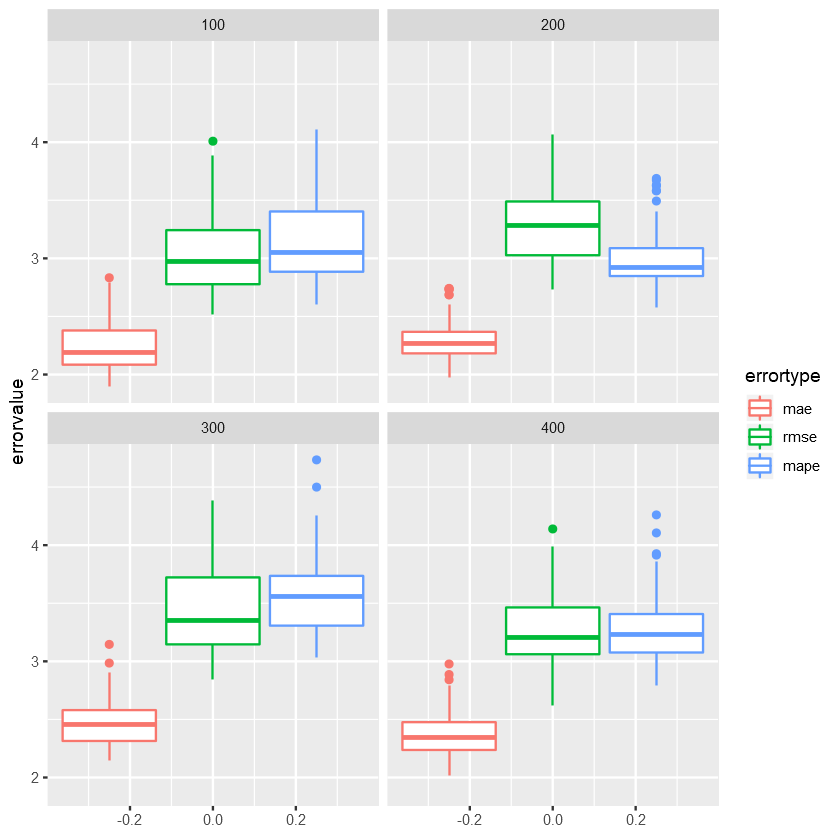

In [47]:
ggplot(data = performance_molten_Ad_seq.1[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.2

In [48]:
#### Model.1 ####
Ad_path.2 = paste0(outputs.path.2,"Ad_sd/")

obb_error_Ad.2              = fread(paste0(Ad_path.2,model.type.2,"_obb_error_Ad",".csv"))
performance_table_Ad.2      = fread(paste0(Ad_path.2,model.type.2,"_performance_table_Ad",".csv"))
predictedLabels_Ad.2        = fread(paste0(Ad_path.2,model.type.2,"_predictedLabels_table_Ad",".csv"))
FinalTrainData_Ad.2         = fread(paste0(Ad_path.2,model.type.2,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.2       = fread(paste0(Ad_path.2,model.type.2,"_train_candidates_table_Ad",".csv"))

In [49]:
performance_molten_Ad_seq.2 <- melt(data = performance_table_Ad.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_seq.2, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Ad_seq.2 <- melt(data = predictedLabels_Ad.2
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Ad_seq.2, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Ad_seq.2[,iter := as.numeric(str_sub(iter, 13))]

In [50]:
test_ave_performance_molten_Ad_seq.2 = performance_molten_Ad_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration 

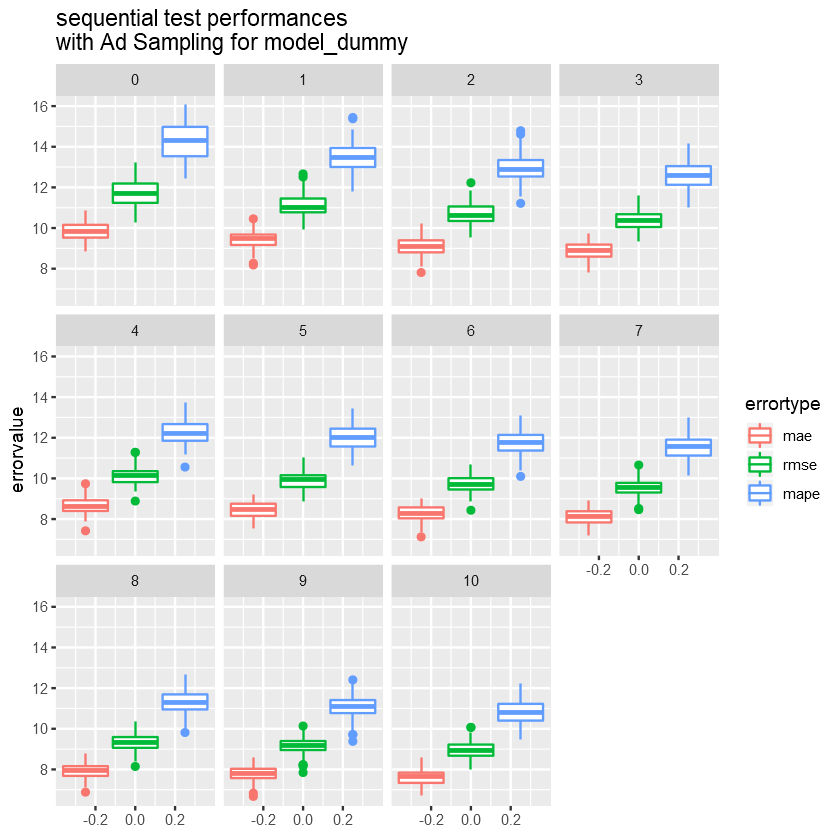

In [51]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Ad_seq_ind_bxp.2 = ggplot(test_ave_performance_molten_Ad_seq.2, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Ad Sampling for model_",model.type.2))
Ad_seq_ind_bxp.2


### Overall BoxPlot 

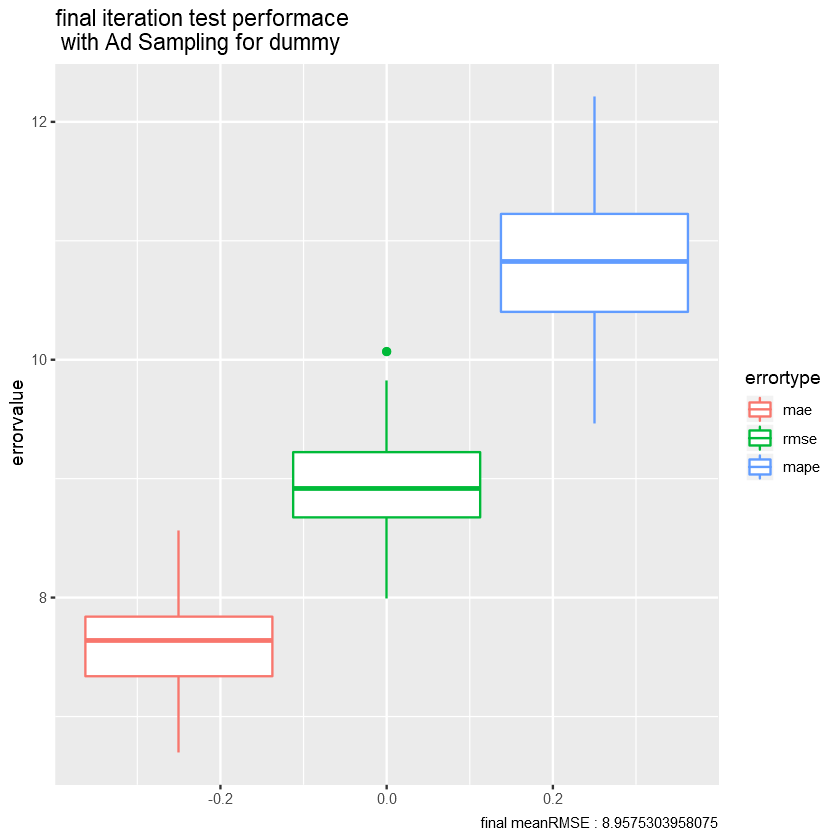

In [52]:
#### Overall BoxPlot ####
Ad_seq_bxp.2 = ggplot(data = test_ave_performance_molten_Ad_seq.2[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Ad_seq.2[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Ad Sampling for ",model.type.2))
                    
Ad_seq_bxp.2

In [53]:
boxplot.stats(test_ave_performance_molten_Ad_seq.2[iter == 10 & errortype =="rmse"]$errorvalue)


$stats
[1] 7.991331 8.673922 8.914819 9.227409 9.826583

$n
[1] 100

$conf
[1] 8.827368 9.002270

$out
[1] 10.06985 10.06759

### Test Set Size Comparison

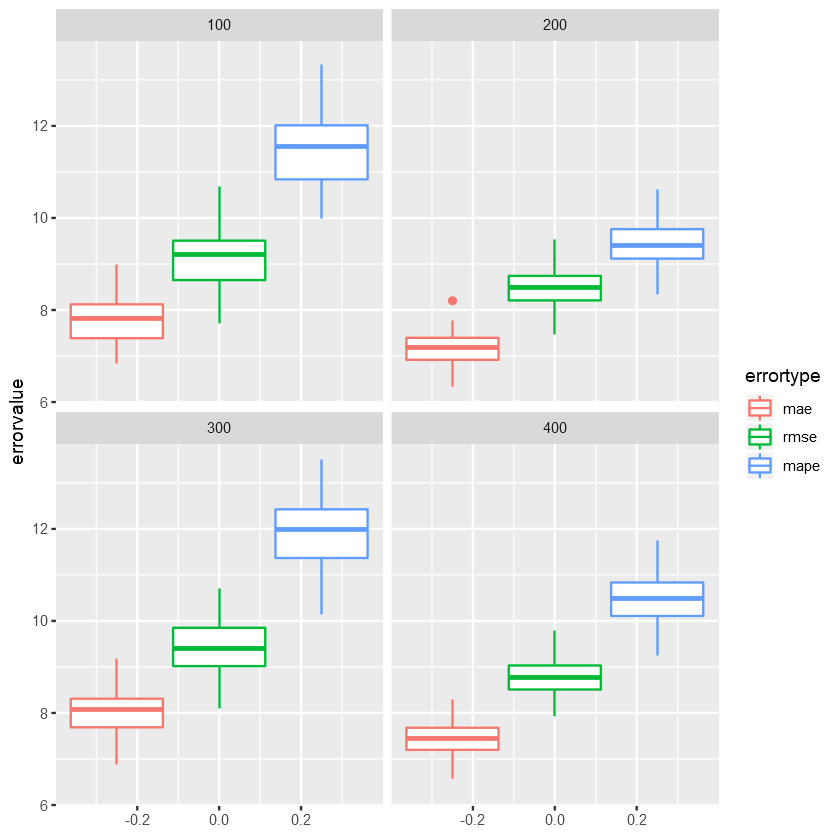

In [54]:
ggplot(data = performance_molten_Ad_seq.2[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.1 vs Model.2

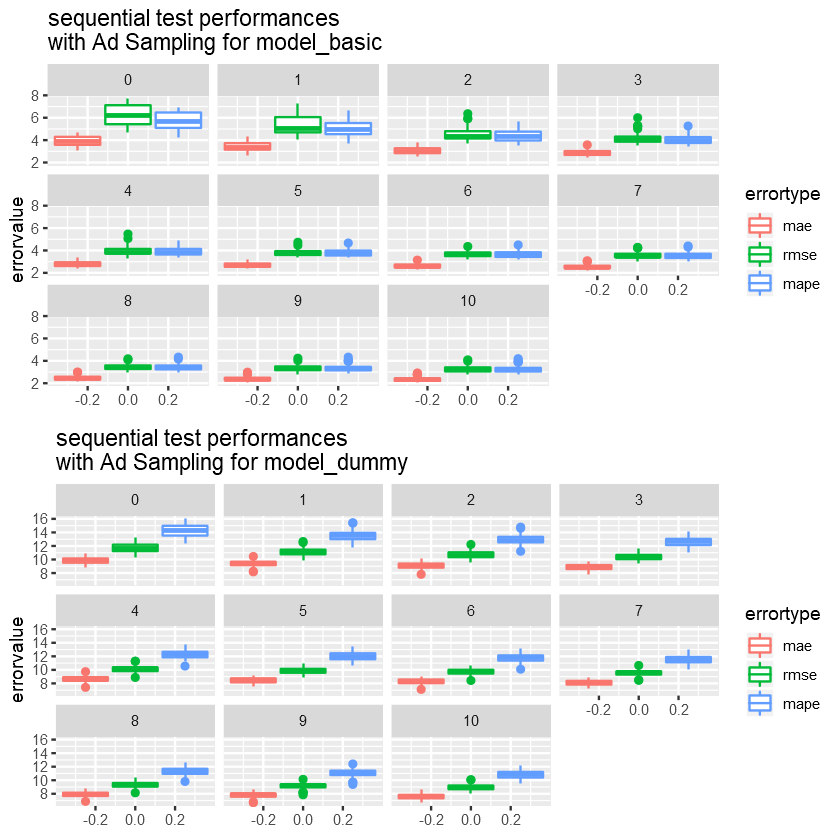

In [55]:
grid.arrange(Ad_seq_ind_bxp.1,Ad_seq_ind_bxp.2)

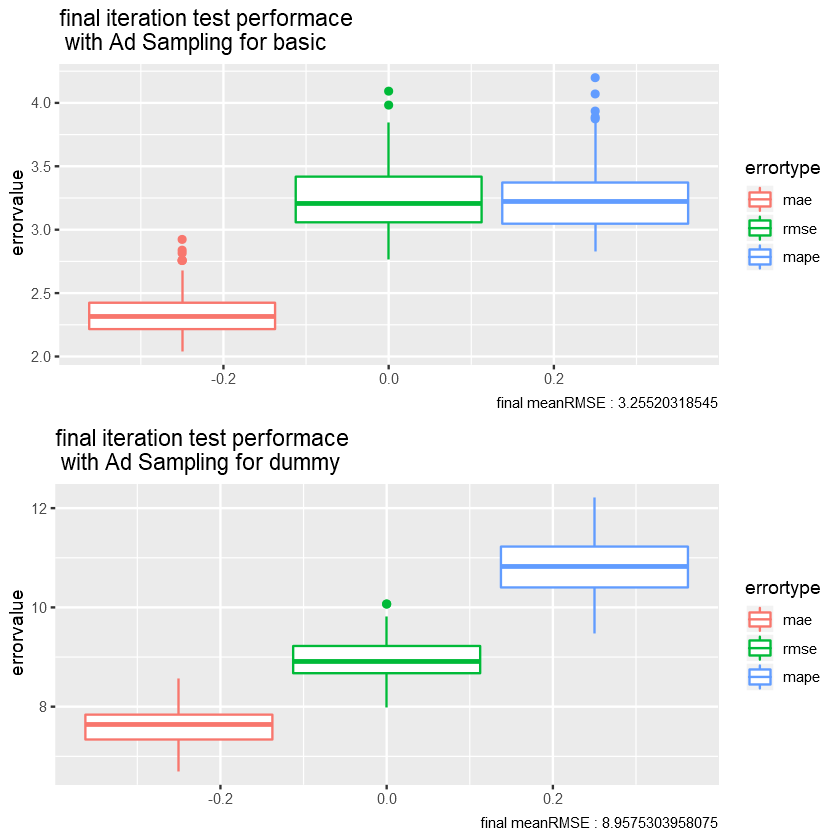

In [56]:
grid.arrange(Ad_seq_bxp.1,Ad_seq_bxp.2)

# 3 Scenarios

## Model.1

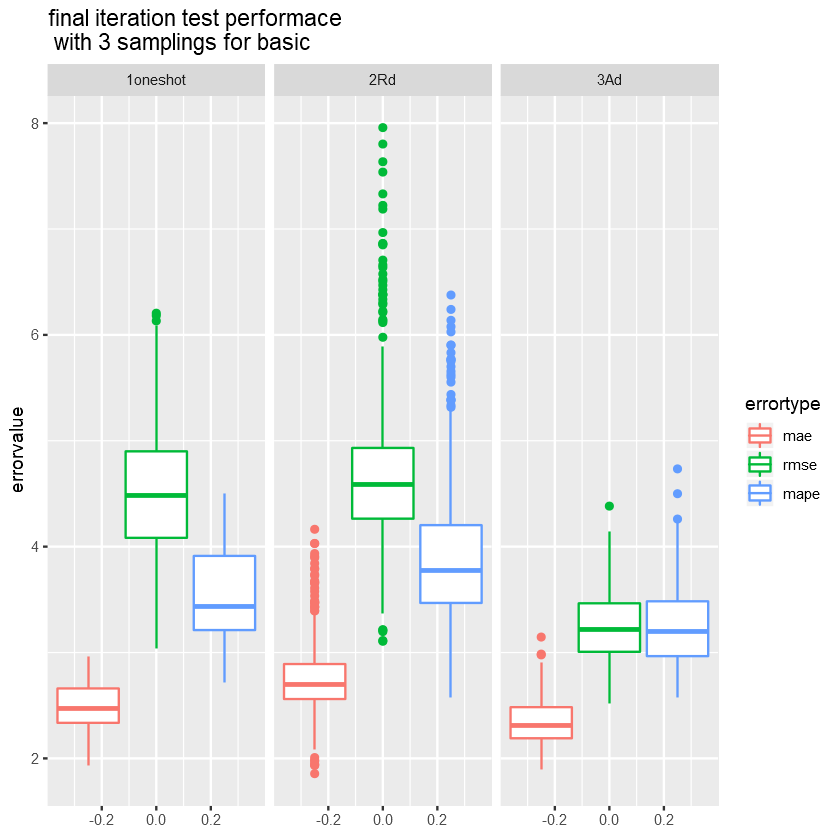

In [57]:
#### all BoxPlot ####
all_bxp.1 = ggplot(data = rbind(data.table(performance_molten_Ad_seq.1[iter == max(unique(performance_molten_Rd_seq.2$iter))], sampling = "3Ad")
                                   ,data.table(performance_molten_Rd_seq.1[iter == max(unique(performance_molten_Rd_seq.2$iter))], sampling = "2Rd")
                                   ,data.table(performance_molten_oneshot.1, sampling = "1oneshot"))
                    , aes( y = errorvalue, group=errortype, col=errortype)) +
                    facet_wrap(~sampling) +
                    geom_boxplot(aes(colour = errortype)) +
                    ggtitle(paste0("final iteration test performace","\n"," with 3 samplings for ",model.type.1))
                    
all_bxp.1

## Model.2

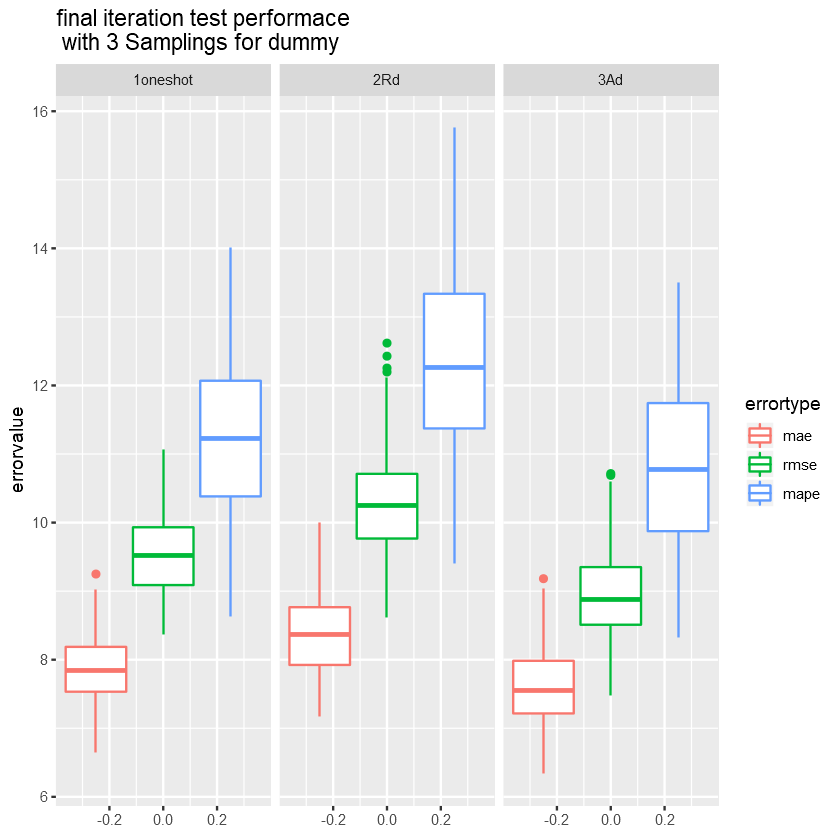

In [58]:
#### all BoxPlot ####
all_bxp.2 = ggplot(data = rbind(data.table(performance_molten_Ad_seq.2[iter == max(unique(performance_molten_Rd_seq.2$iter))], sampling = "3Ad")
                                   ,data.table(performance_molten_Rd_seq.2[iter == max(unique(performance_molten_Rd_seq.2$iter))], sampling = "2Rd")
                                   ,data.table(performance_molten_oneshot.2, sampling = "1oneshot"))
                    , aes( y = errorvalue, group=errortype, col=errortype)) +
                    facet_wrap(~sampling) +
                    geom_boxplot(aes(colour = errortype)) +
                    ggtitle(paste0("final iteration test performace","\n"," with 3 Samplings for ",model.type.2))
                    
all_bxp.2

# Adaptive Sampling Replications With Range

In [59]:
#### Adaptive Sampling  With Range ####

## Model.1

In [60]:
#### Model.1 ####
Ad_range_path.1 = paste0(outputs.path.1,"Ad_range/")

obb_error_Ad_range.1              = fread(paste0(Ad_range_path.1,model.type.1,"_obb_error_Ad_range",".csv"))
performance_table_Ad_range.1      = fread(paste0(Ad_range_path.1,model.type.1,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad_range.1        = fread(paste0(Ad_range_path.1,model.type.1,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad_range.1         = fread(paste0(Ad_range_path.1,model.type.1,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad_range.1       = fread(paste0(Ad_range_path.1,model.type.1,"_train_candidates_table_Ad_range",".csv"))

In [61]:
performance_molten_Ad_range_seq.1 <- melt(data = performance_table_Ad_range.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_range_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_range_seq.1, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Ad_range_seq.1 <- melt(data = predictedLabels_Ad_range.1
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Ad_range_seq.1, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Ad_range_seq.1[,iter := as.numeric(str_sub(iter, 13))]
#

In [62]:
test_ave_performance_molten_Ad_range_seq.1 = performance_molten_Ad_range_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration

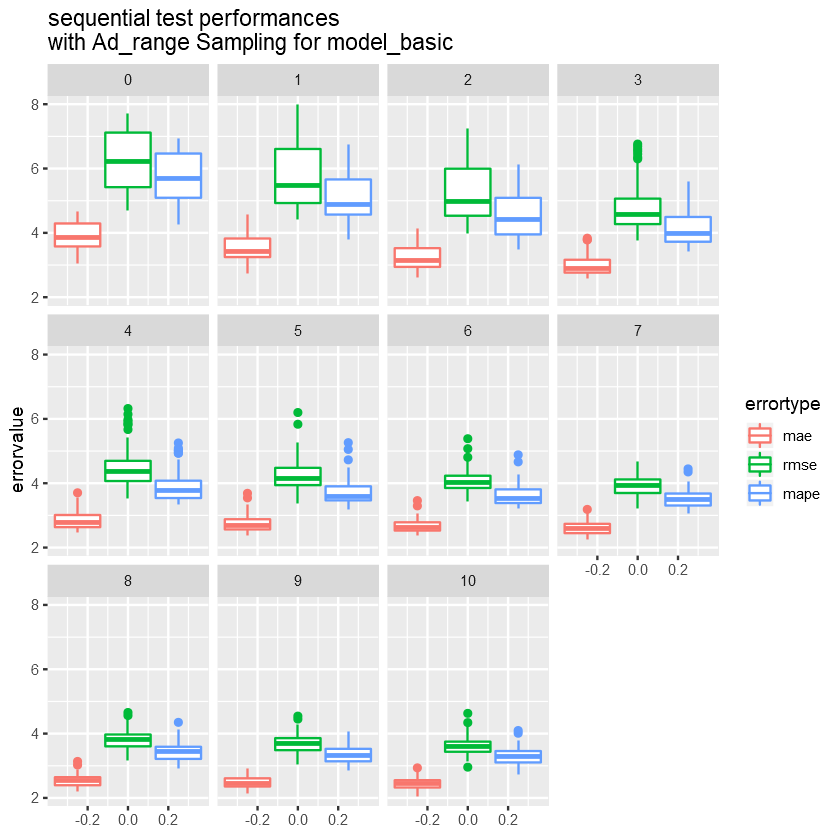

In [63]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Ad_range_seq_ind_bxp.1 = ggplot(test_ave_performance_molten_Ad_range_seq.1, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Ad_range Sampling for model_",model.type.1))
Ad_range_seq_ind_bxp.1

### Overall BoxPlot

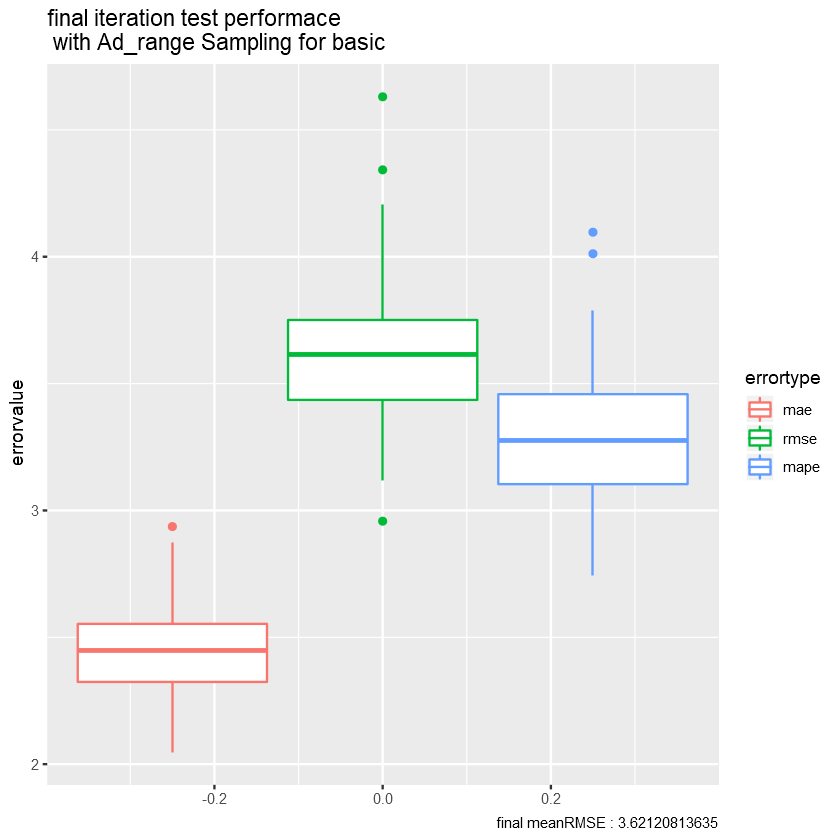

In [64]:
#### Overall BoxPlot ####
Ad_range_seq_bxp.1 = ggplot(data = test_ave_performance_molten_Ad_range_seq.1[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Ad_range_seq.1[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Ad_range Sampling for ",model.type.1))
                    
Ad_range_seq_bxp.1

In [65]:
boxplot.stats(test_ave_performance_molten_Ad_range_seq.1[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1] 2.957860 3.430286 3.614219 3.753672 4.206876

$n
[1] 100

$conf
[1] 3.563124 3.665314

$out
[1] 4.342636 4.630608

### Test Set Size Comparison

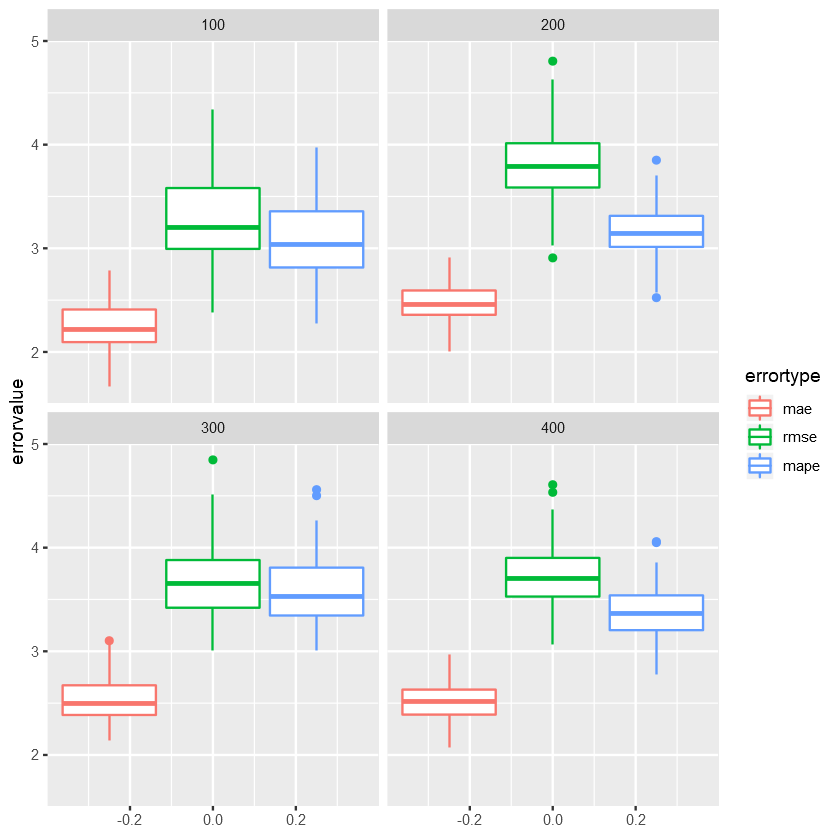

In [66]:
ggplot(data = performance_molten_Ad_range_seq.1[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.2

In [67]:
#### Model.2 ####
Ad_range_path.2 = paste0(outputs.path.2,"Ad_range/")

obb_error_Ad_range.2              = fread(paste0(Ad_range_path.2,model.type.2,"_obb_error_Ad_range",".csv"))
performance_table_Ad_range.2      = fread(paste0(Ad_range_path.2,model.type.2,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad_range.2        = fread(paste0(Ad_range_path.2,model.type.2,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad_range.2         = fread(paste0(Ad_range_path.2,model.type.2,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad_range.2       = fread(paste0(Ad_range_path.2,model.type.2,"_train_candidates_table_Ad_range",".csv"))

In [68]:
performance_molten_Ad_range_seq.2 <- melt(data = performance_table_Ad_range.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_range_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_range_seq.2, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Ad_range_seq.2 <- melt(data = predictedLabels_Ad_range.2
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Ad_range_seq.2, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Ad_range_seq.2[,iter := as.numeric(str_sub(iter, 13))]

In [69]:
test_ave_performance_molten_Ad_range_seq.2 = performance_molten_Ad_range_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration 

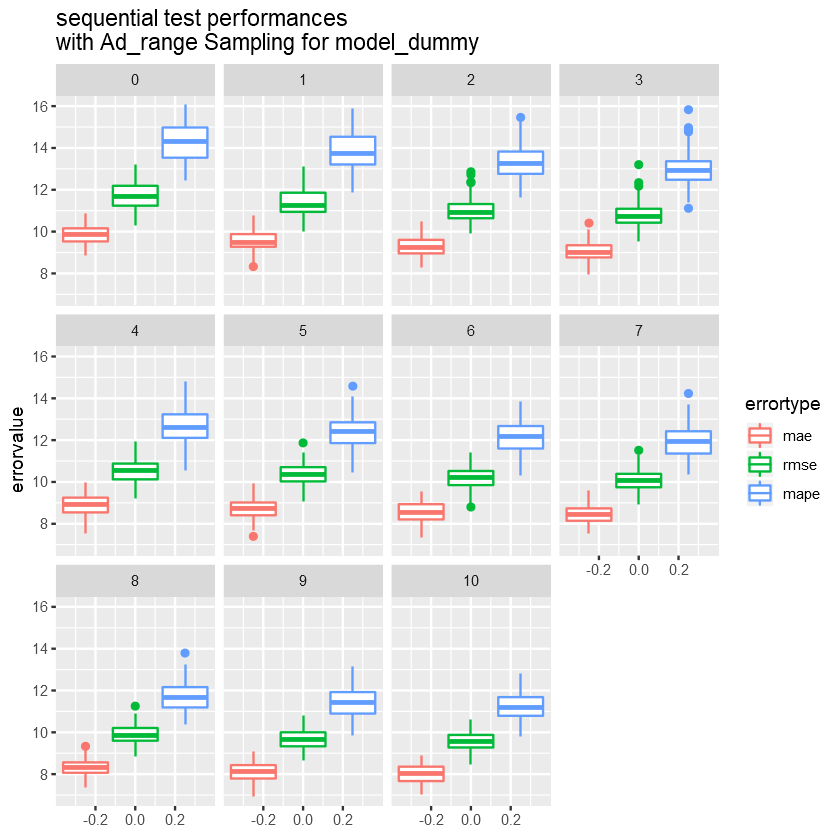

In [70]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Ad_range_seq_ind_bxp.2 = ggplot(test_ave_performance_molten_Ad_range_seq.2, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Ad_range Sampling for model_",model.type.2))
Ad_range_seq_ind_bxp.2


### Overall BoxPlot 

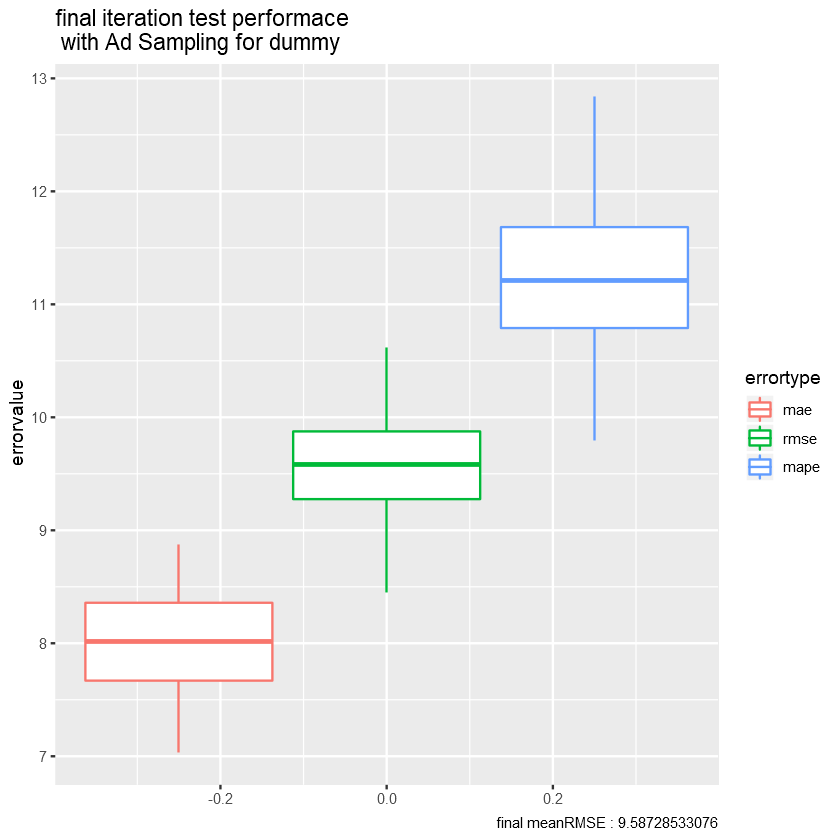

In [71]:
#### Overall BoxPlot ####
Ad_range_seq_bxp.2 = ggplot(data = test_ave_performance_molten_Ad_range_seq.2[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Ad_range_seq.2[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Ad Sampling for ",model.type.2))
                    
Ad_range_seq_bxp.2

In [72]:
boxplot.stats(test_ave_performance_molten_Ad_range_seq.2[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1]  8.452791  9.275358  9.578901  9.876492 10.617128

$n
[1] 100

$conf
[1] 9.483922 9.673880

$out
numeric(0)

### Test Set Size Comparison

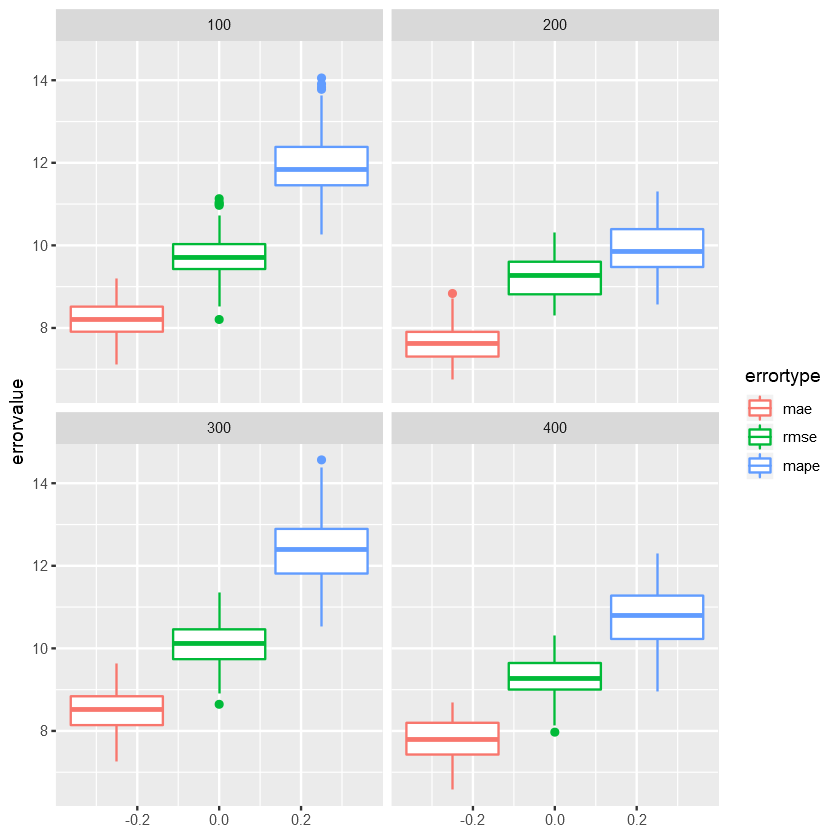

In [73]:
ggplot(data = performance_molten_Ad_range_seq.2[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.1 vs Model.2

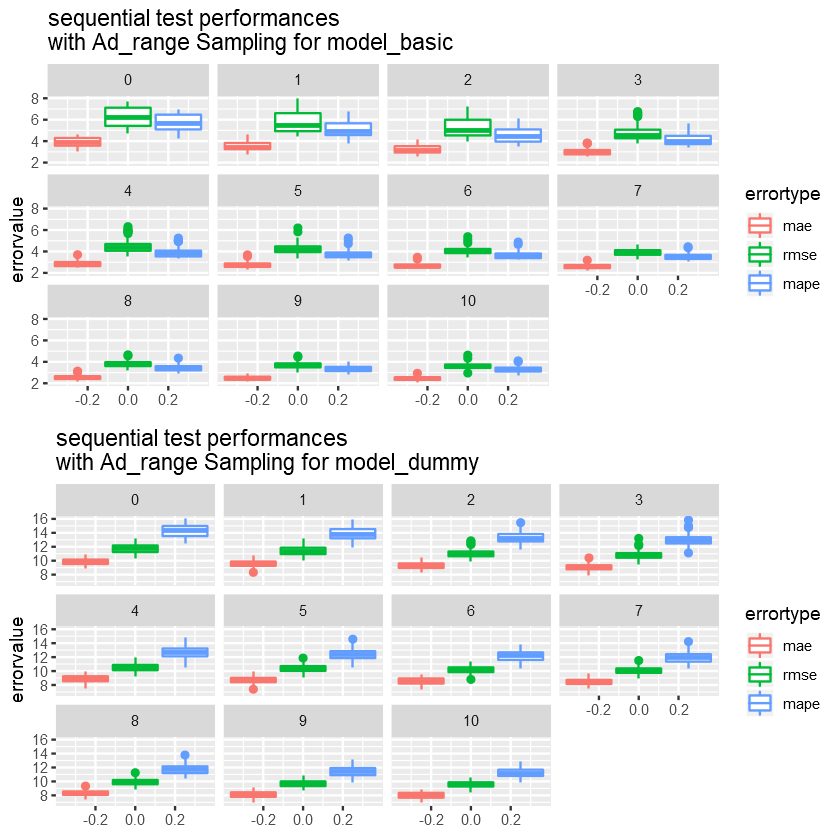

In [74]:
grid.arrange(Ad_range_seq_ind_bxp.1,Ad_range_seq_ind_bxp.2)

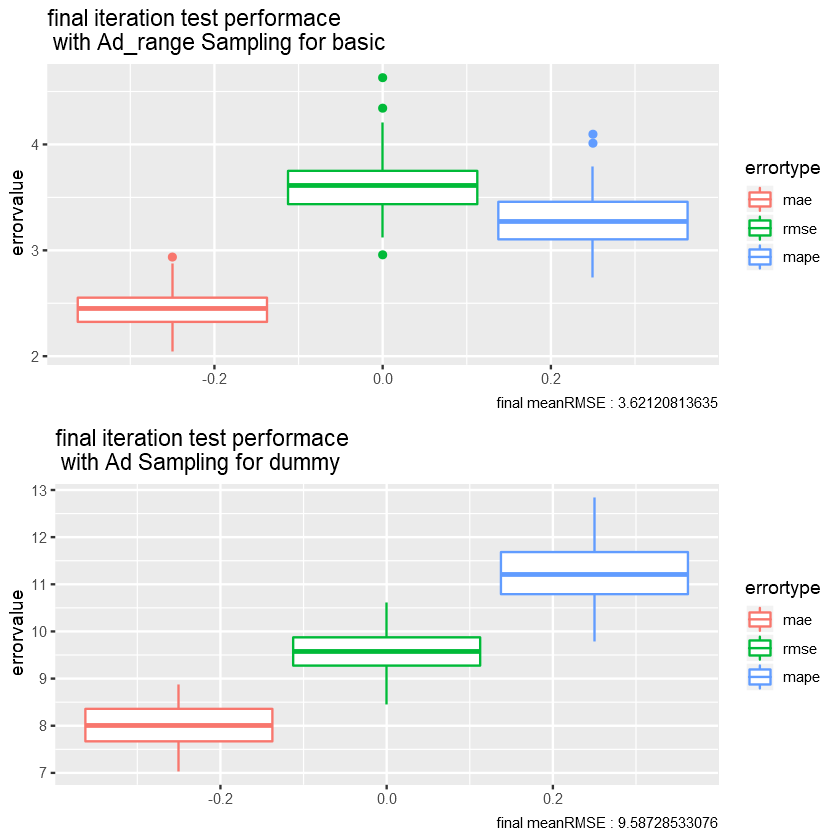

In [75]:
grid.arrange(Ad_range_seq_bxp.1,Ad_range_seq_bxp.2)

# Adaptive Sampling Replications With Coefvar

In [76]:
#### Adaptive Sampling  With Coefvar ####

## Model.1

In [77]:
#### Model.1 ####
Ad_coefvar_path.1 = paste0(outputs.path.1,"Ad_coefvar/")

obb_error_Ad_coefvar.1              = fread(paste0(Ad_coefvar_path.1,model.type.1,"_obb_error_Ad_coefvar",".csv"))
performance_table_Ad_coefvar.1      = fread(paste0(Ad_coefvar_path.1,model.type.1,"_performance_table_Ad_coefvar",".csv"))
predictedLabels_Ad_coefvar.1        = fread(paste0(Ad_coefvar_path.1,model.type.1,"_predictedLabels_table_Ad_coefvar",".csv"))
FinalTrainData_Ad_coefvar.1         = fread(paste0(Ad_coefvar_path.1,model.type.1,"_FinalTrainData_Ad_coefvar",".csv"))
train_candidates_Ad_coefvar.1       = fread(paste0(Ad_coefvar_path.1,model.type.1,"_train_candidates_table_Ad_coefvar",".csv"))

In [78]:
performance_molten_Ad_coefvar_seq.1 <- melt(data = performance_table_Ad_coefvar.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_coefvar_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_coefvar_seq.1, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Ad_coefvar_seq.1 <- melt(data = predictedLabels_Ad_coefvar.1
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Ad_coefvar_seq.1, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Ad_coefvar_seq.1[,iter := as.numeric(str_sub(iter, 13))]
#

In [79]:
test_ave_performance_molten_Ad_coefvar_seq.1 = performance_molten_Ad_coefvar_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration

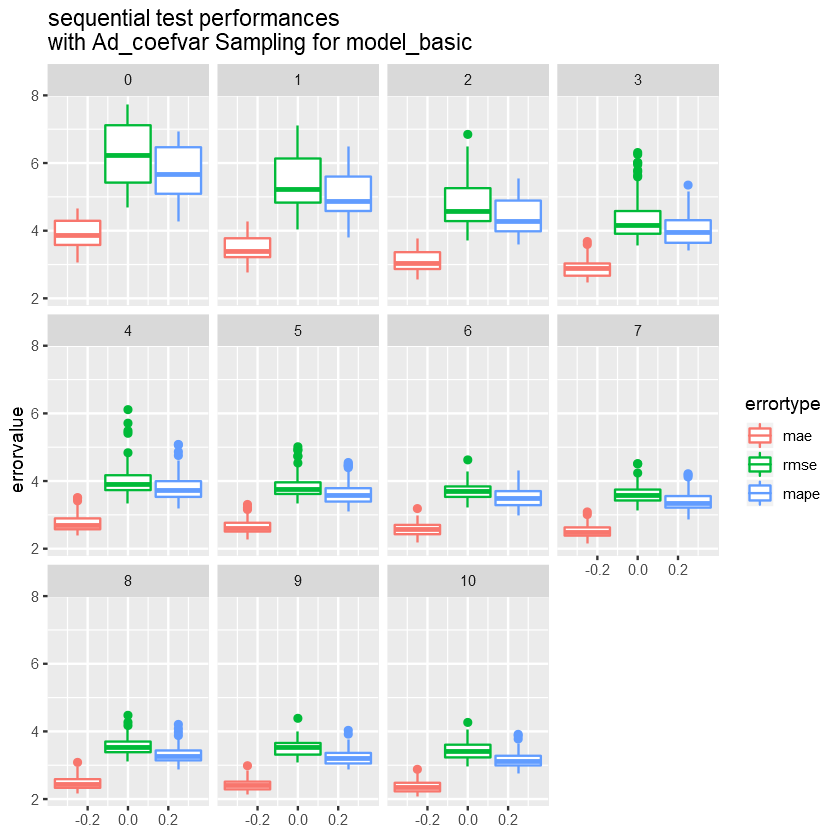

In [80]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Ad_coefvar_seq_ind_bxp.1 = ggplot(test_ave_performance_molten_Ad_coefvar_seq.1, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Ad_coefvar Sampling for model_",model.type.1))
Ad_coefvar_seq_ind_bxp.1

### Overall BoxPlot

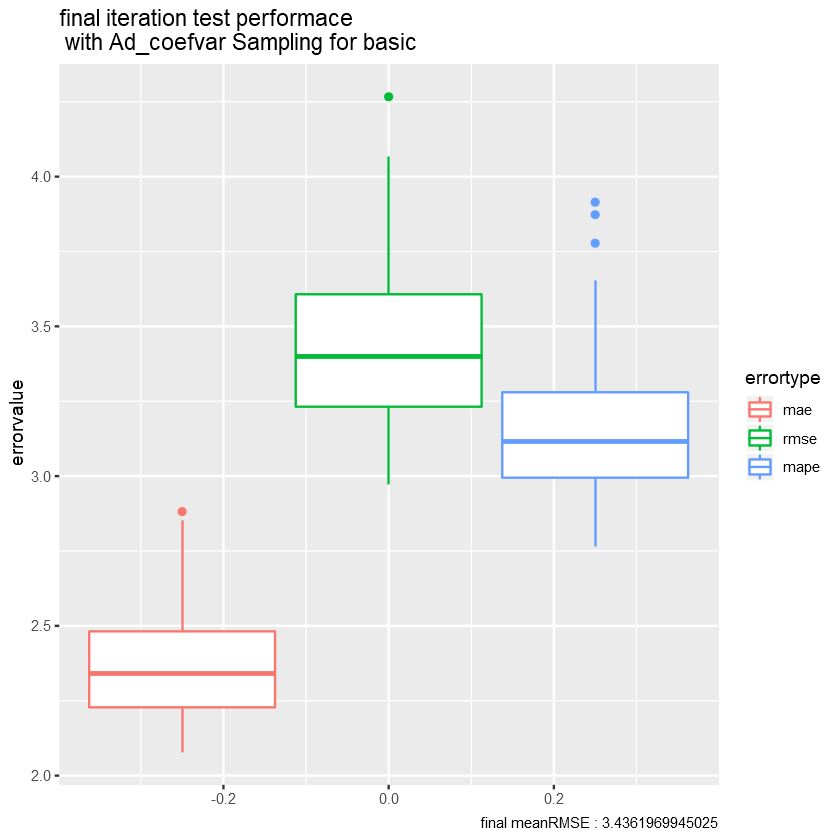

In [81]:
#### Overall BoxPlot ####
Ad_coefvar_seq_bxp.1 = ggplot(data = test_ave_performance_molten_Ad_coefvar_seq.1[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Ad_coefvar_seq.1[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Ad_coefvar Sampling for ",model.type.1))
                    
Ad_coefvar_seq_bxp.1

In [82]:
boxplot.stats(test_ave_performance_molten_Ad_coefvar_seq.1[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1] 2.971619 3.231528 3.400383 3.611122 4.066340

$n
[1] 100

$conf
[1] 3.340407 3.460359

$out
[1] 4.266643

### Test Set Size Comparison

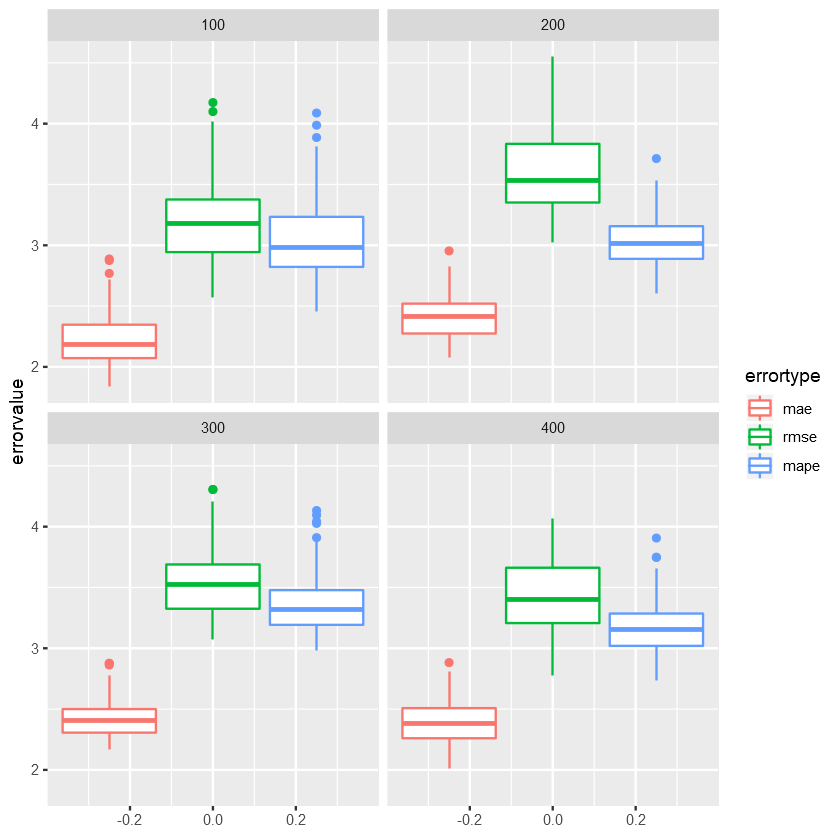

In [83]:
ggplot(data = performance_molten_Ad_coefvar_seq.1[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.2

In [84]:
#### Model.2 ####
Ad_coefvar_path.2 = paste0(outputs.path.2,"Ad_coefvar/")

obb_error_Ad_coefvar.2              = fread(paste0(Ad_coefvar_path.2,model.type.2,"_obb_error_Ad_coefvar",".csv"))
performance_table_Ad_coefvar.2      = fread(paste0(Ad_coefvar_path.2,model.type.2,"_performance_table_Ad_coefvar",".csv"))
predictedLabels_Ad_coefvar.2        = fread(paste0(Ad_coefvar_path.2,model.type.2,"_predictedLabels_table_Ad_coefvar",".csv"))
FinalTrainData_Ad_coefvar.2         = fread(paste0(Ad_coefvar_path.2,model.type.2,"_FinalTrainData_Ad_coefvar",".csv"))
train_candidates_Ad_coefvar.2       = fread(paste0(Ad_coefvar_path.2,model.type.2,"_train_candidates_table_Ad_coefvar",".csv"))

In [85]:
performance_molten_Ad_coefvar_seq.2 <- melt(data = performance_table_Ad_coefvar.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_coefvar_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_coefvar_seq.2, c("variable","value"),c("errortype","errorvalue"))

#predictedLabels_molten_Ad_coefvar_seq.2 <- melt(data = predictedLabels_Ad_coefvar.2
#                             , id.vars = c("density","%-similar-wanted",'output',"seed","rep")
#                             , measure.vars = c("pred_output_1","pred_output_2","pred_output_3","pred_output_4","pred_output_5","pred_output_6","pred_output_7","pred_output_8","pred_output_9","pred_output_10","pred_output_11"))
#setnames(predictedLabels_molten_Ad_coefvar_seq.2, c("variable","value"),c("iter","pred_output"))
#predictedLabels_molten_Ad_coefvar_seq.2[,iter := as.numeric(str_sub(iter, 13))]

In [86]:
test_ave_performance_molten_Ad_coefvar_seq.2 = performance_molten_Ad_coefvar_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

### Replications on Each Iteration 

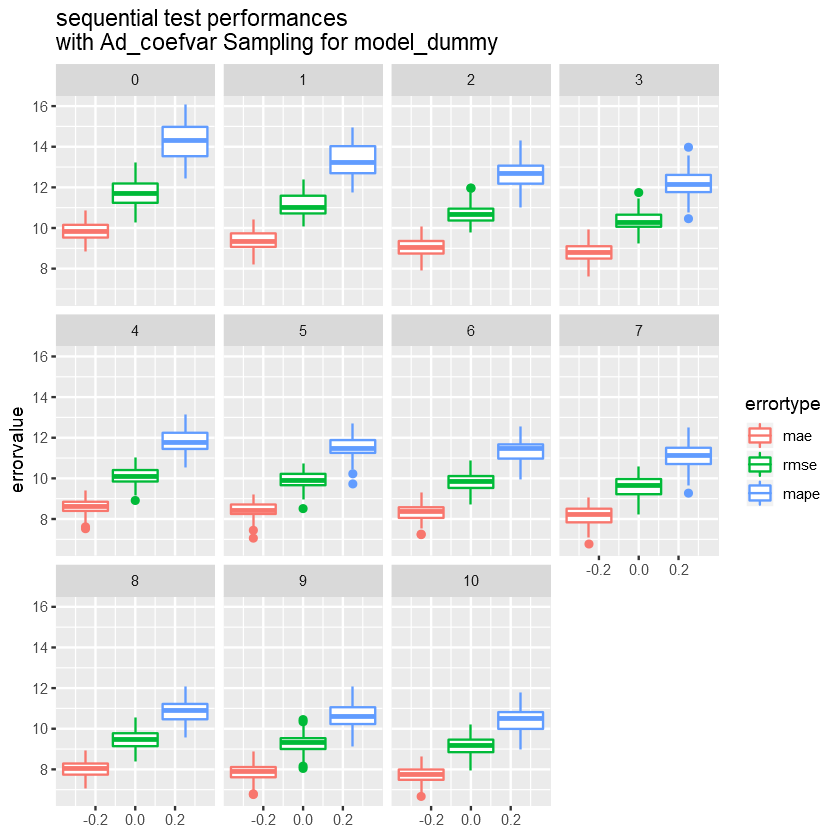

In [87]:
#### Replications on Each Iteration ####
# Observe the boxplots in each iterations
Ad_coefvar_seq_ind_bxp.2 = ggplot(test_ave_performance_molten_Ad_coefvar_seq.2, aes(y = errorvalue, group=errortype, col=errortype)) + 
                  geom_boxplot()+
                  facet_wrap(~iter) +
                #  geom_hline(data = performance_molten_oneshot, aes(yintercept = errorvalue, group=errortype, col=errortype),stat = "hline", linetype = "dashed") +
                  ggtitle(paste0("sequential test performances","\n","with Ad_coefvar Sampling for model_",model.type.2))
Ad_coefvar_seq_ind_bxp.2


### Overall BoxPlot 

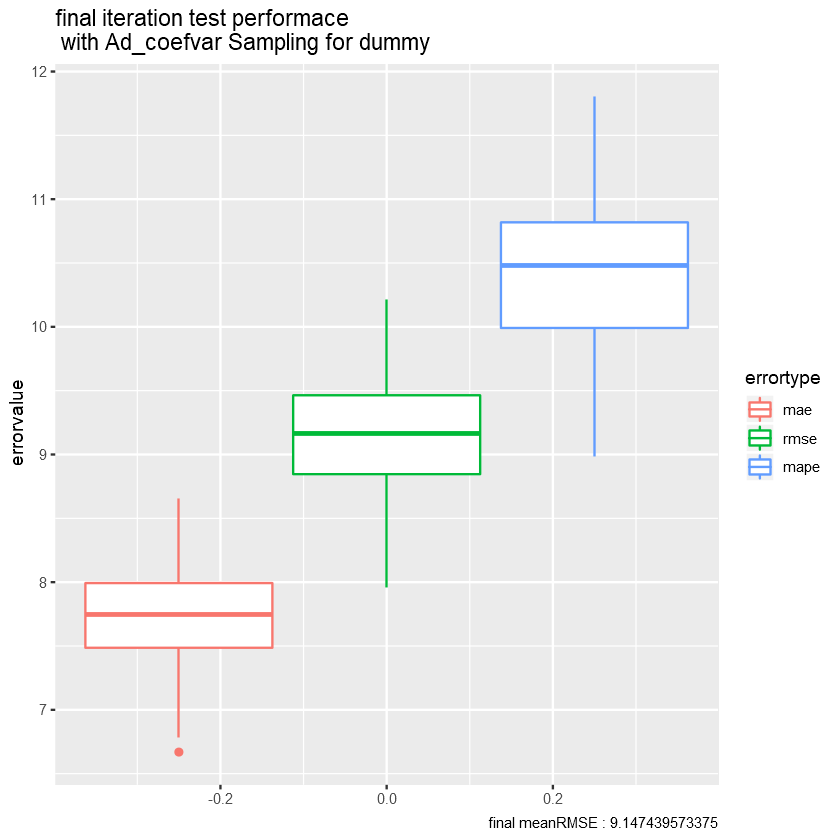

In [88]:
#### Overall BoxPlot ####
Ad_coefvar_seq_bxp.2 = ggplot(data = test_ave_performance_molten_Ad_coefvar_seq.2[iter == 10], aes( y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    labs( caption = paste0("final meanRMSE : ",mean(test_ave_performance_molten_Ad_coefvar_seq.2[iter == 10 & errortype == "rmse"]$errorvalue))) +
                    ggtitle(paste0("final iteration test performace","\n"," with Ad_coefvar Sampling for ",model.type.2))
                    
Ad_coefvar_seq_bxp.2

In [89]:
boxplot.stats(test_ave_performance_molten_Ad_coefvar_seq.2[iter == 10 & errortype =="rmse"]$errorvalue)

$stats
[1]  7.961906  8.843344  9.166069  9.471534 10.212103

$n
[1] 100

$conf
[1] 9.066815 9.265323

$out
numeric(0)

### Test Set Size Comparison

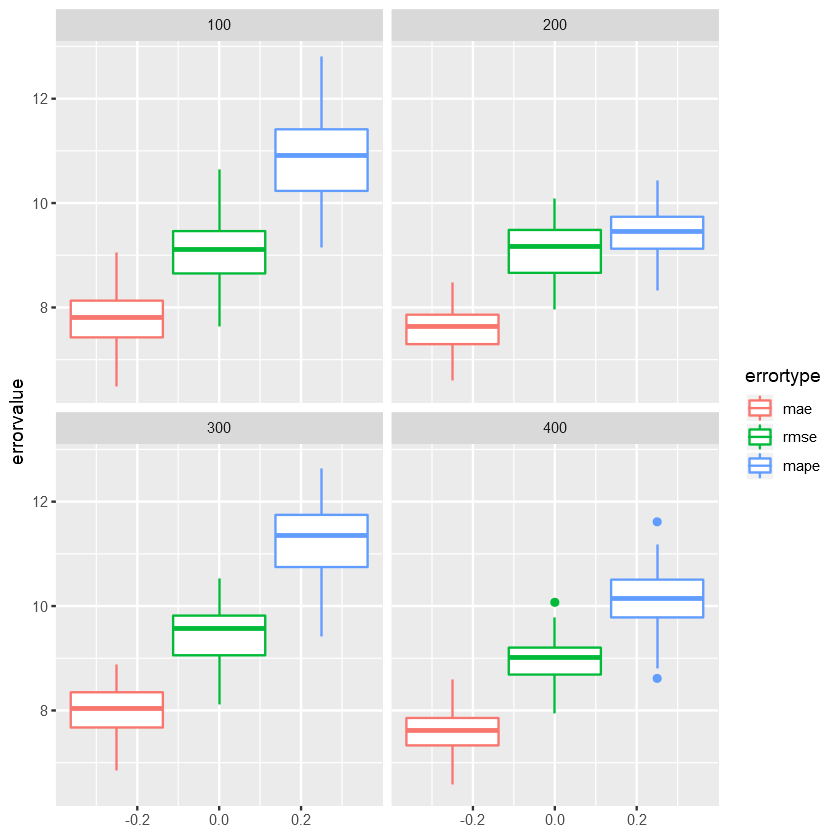

In [90]:
ggplot(data = performance_molten_Ad_coefvar_seq.2[iter == 10], aes(y = errorvalue, group=errortype, col=errortype)) +
                    geom_boxplot(aes(colour = errortype)) +
                    facet_wrap(~ size) #+
                    #labs( caption = paste0("meanRMSE : ",mean(performance_table_oneshot.2$rmse))) +

## Model.1 vs Model.2

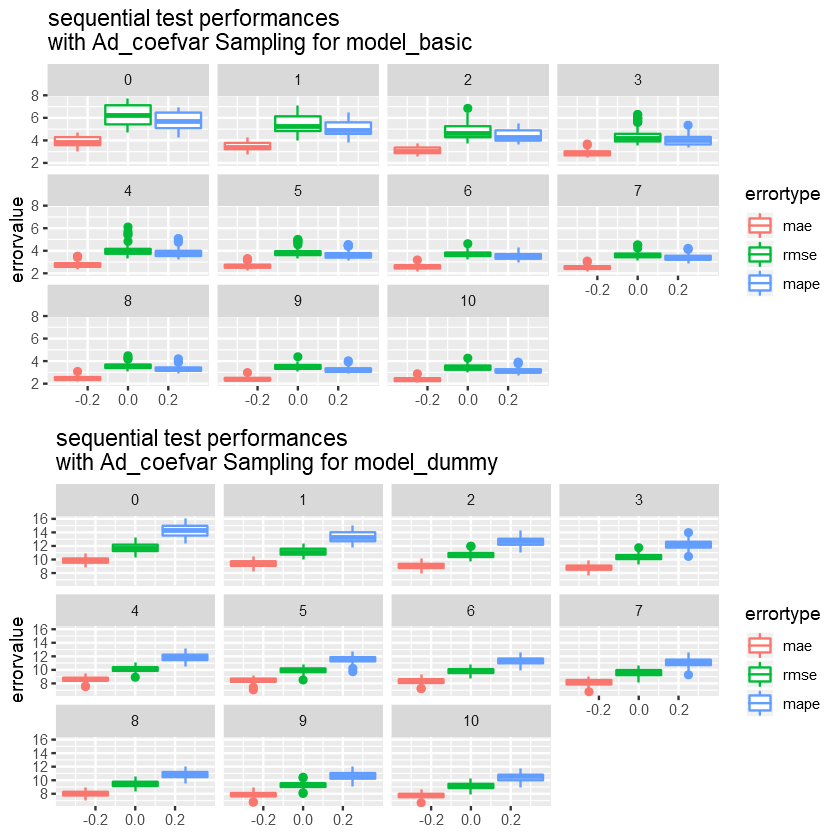

In [91]:
grid.arrange(Ad_coefvar_seq_ind_bxp.1,Ad_coefvar_seq_ind_bxp.2)

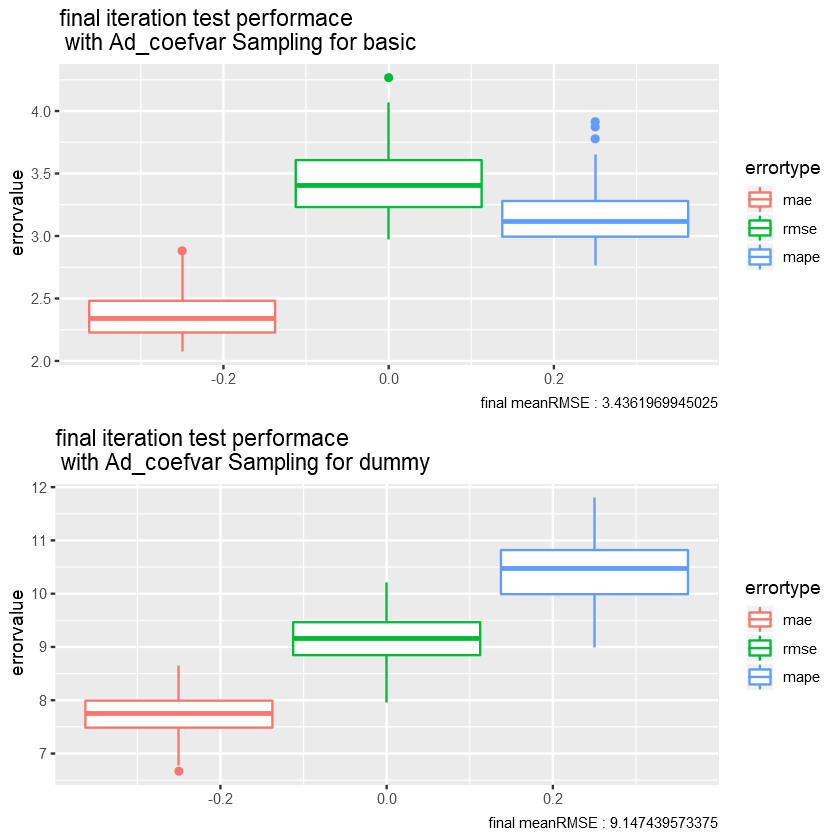

In [92]:
grid.arrange(Ad_coefvar_seq_bxp.1,Ad_coefvar_seq_bxp.2)

# 5 Scenarios_Part 1

## Model.1

In [93]:
rmse_graph_molten_data.1 = rbind(data.table(performance_molten_Ad_seq.1[errortype == "rmse"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.1[errortype == "rmse"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.1[errortype == "rmse"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.1[errortype == "rmse"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_rmse_graph_molten_data.1 = rmse_graph_molten_data.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

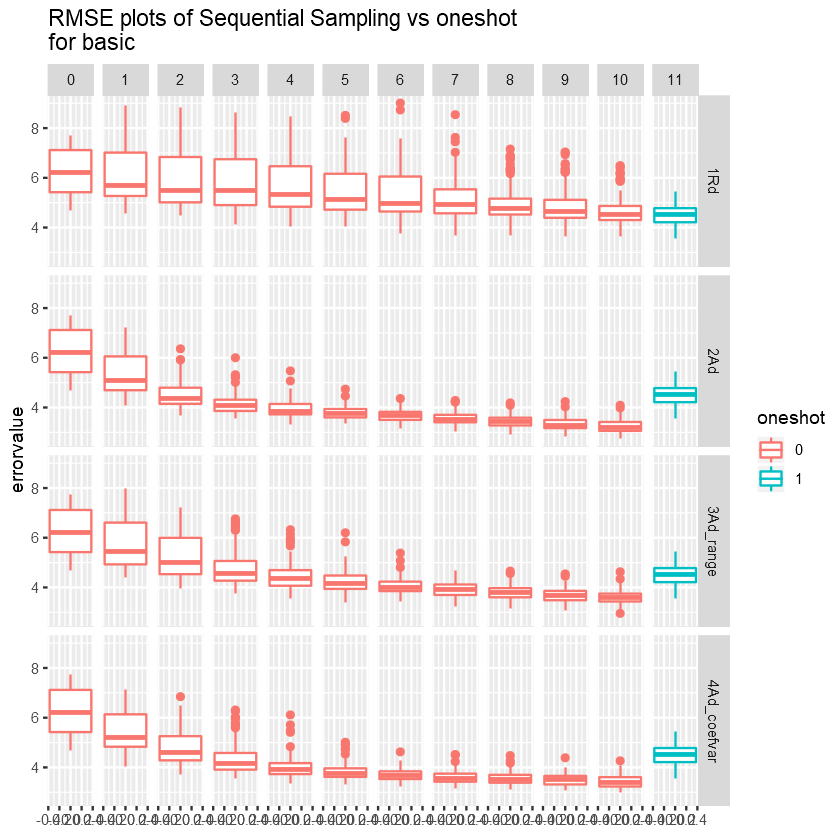

In [94]:
ggplot(test_ave_rmse_graph_molten_data.1, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

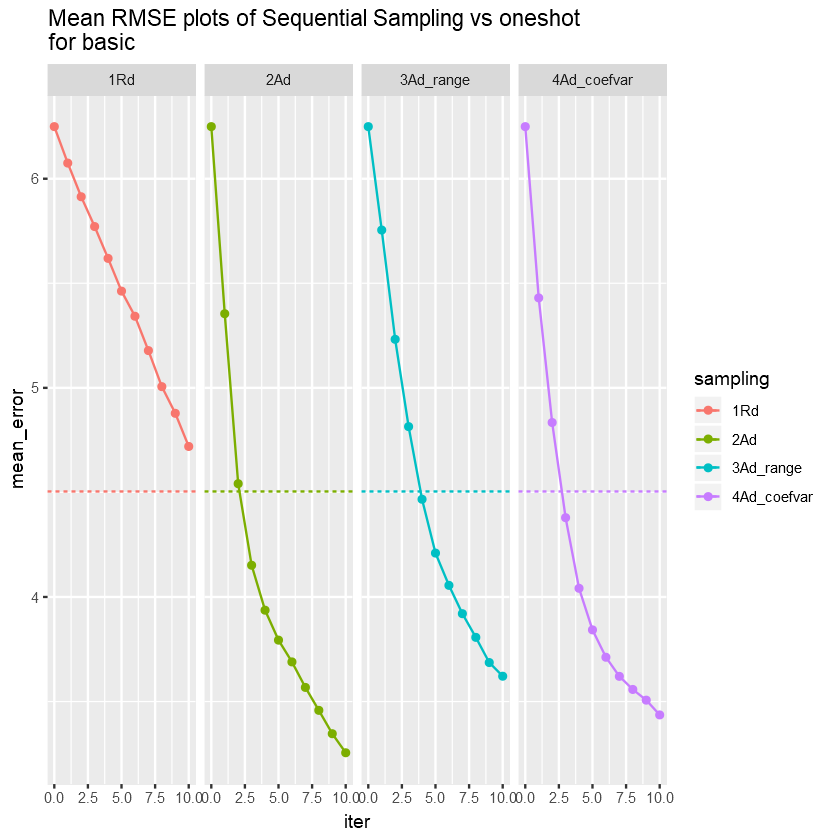

In [95]:
mean_rmse.1 = test_ave_rmse_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mean_rmse.1[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mean_rmse.1[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mean_rmse.1[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
 ggtitle(paste0("Mean RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

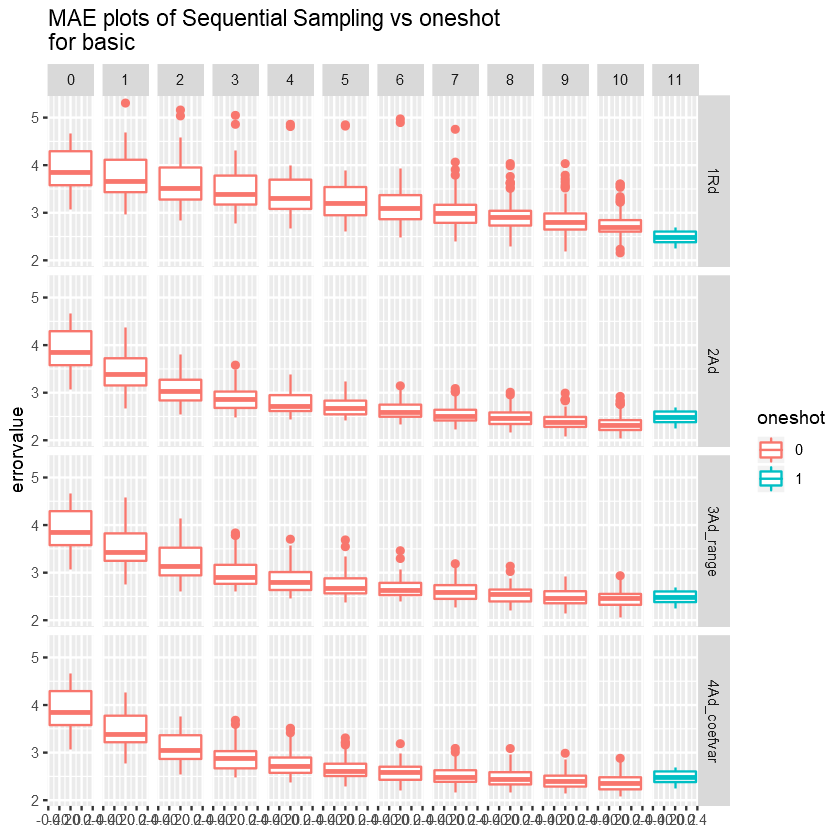

In [96]:
mae_graph_molten_data.1 = rbind(data.table(performance_molten_Ad_seq.1[errortype == "mae"], sampling = "2Ad", oneshot = "0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                             ,data.table(performance_molten_Ad_range_seq.1[errortype == "mae"], sampling = "3Ad_range",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                             ,data.table(performance_molten_Ad_coefvar_seq.1[errortype == "mae"], sampling = "4Ad_coefvar",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                             ,data.table(performance_molten_Rd_seq.1[errortype == "mae"], sampling = "1Rd",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )

test_ave_mae_graph_molten_data.1 = mae_graph_molten_data.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

ggplot(test_ave_mae_graph_molten_data.1, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

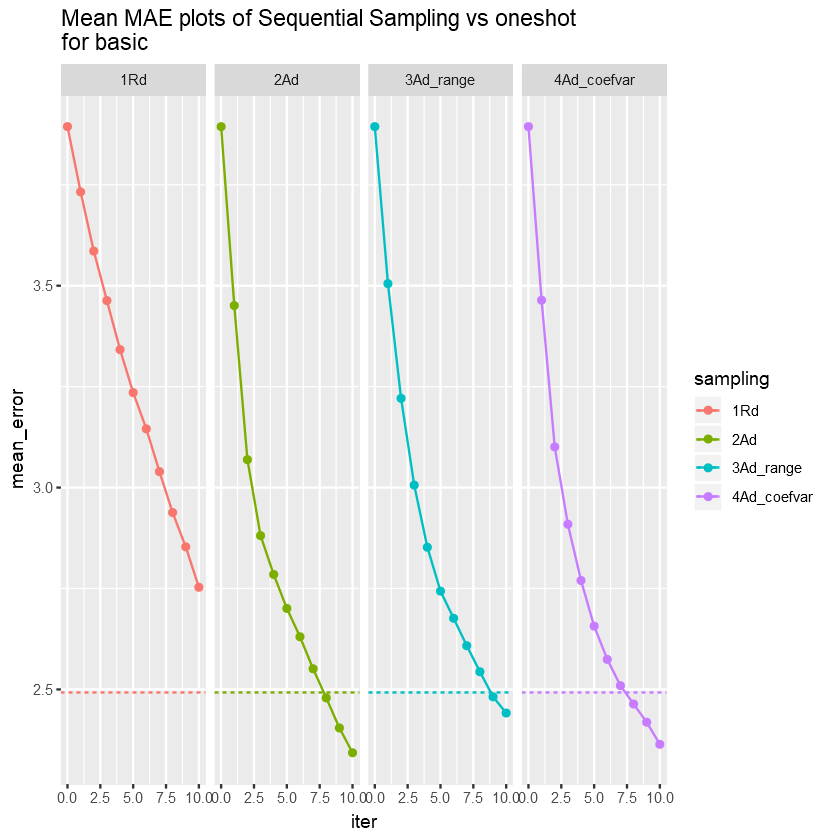

In [97]:
mae_rmse.1 = test_ave_mae_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mae_rmse.1[iter !=11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mae_rmse.1[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mae_rmse.1[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

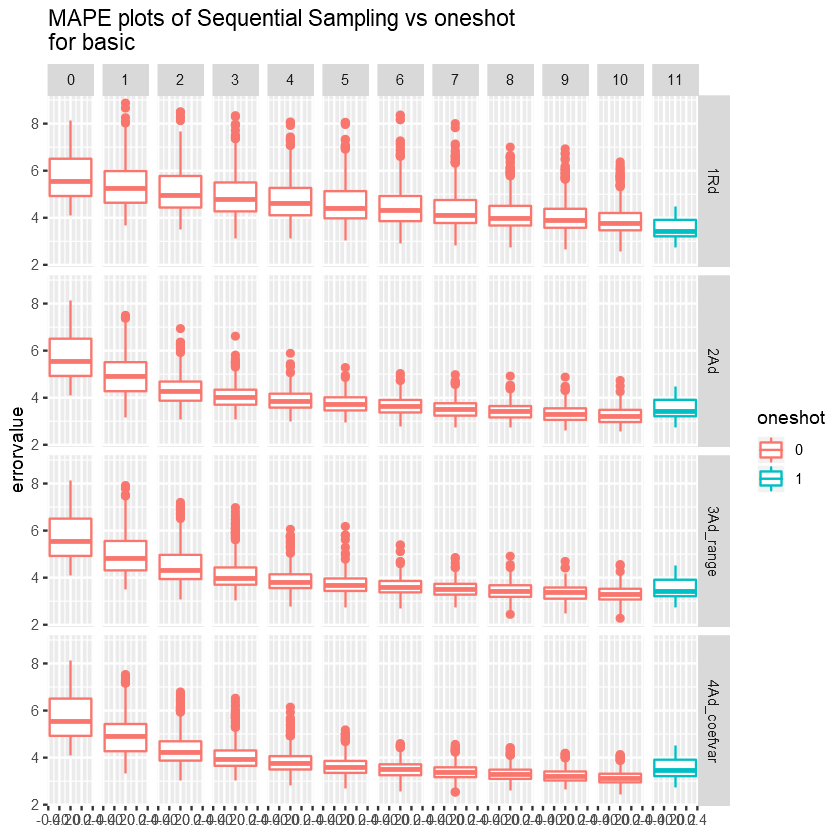

In [98]:
mape_graph_molten_data.1 = rbind(data.table(performance_molten_Ad_seq.1[errortype == "mape"], sampling = "2Ad", oneshot = "0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                             ,data.table(performance_molten_Ad_range_seq.1[errortype == "mape"], sampling = "3Ad_range",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                             ,data.table(performance_molten_Ad_coefvar_seq.1[errortype == "mape"], sampling = "4Ad_coefvar",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                             ,data.table(performance_molten_Rd_seq.1[errortype == "mape"], sampling = "1Rd",oneshot="0")
                             ,data.table(performance_molten_oneshot.1[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )

test_ave_mape_graph_molten_data.1 = mape_graph_molten_data.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

ggplot(mape_graph_molten_data.1, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAPE plots of Sequential Sampling vs oneshot","\n","for ",model.type.1))

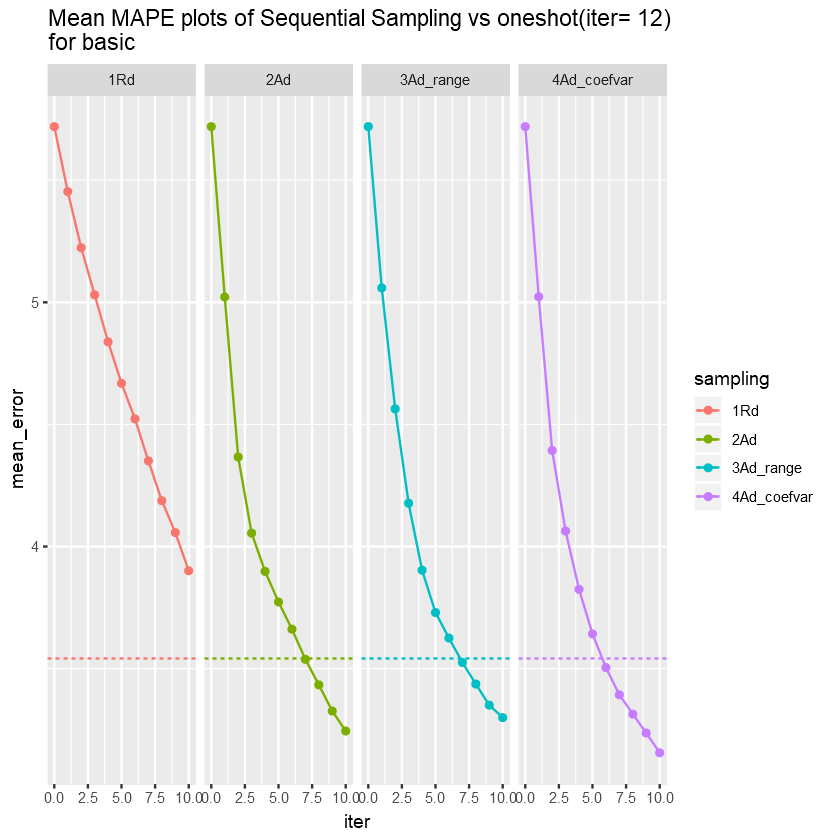

In [99]:
mape_rmse.1 = test_ave_mape_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mape_rmse.1[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mape_rmse.1[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mape_rmse.1[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAPE plots of Sequential Sampling vs oneshot(iter= 12)","\n","for ",model.type.1))

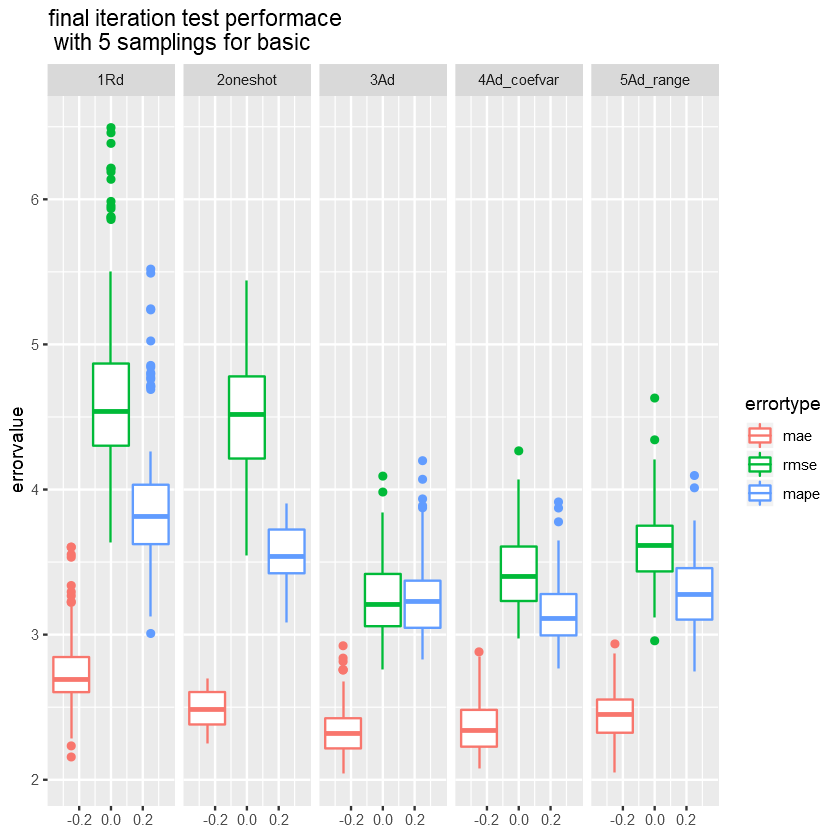

In [100]:
all_range_bxp.1 = ggplot(data = rbind(data.table(test_ave_performance_molten_Ad_range_seq.1[iter == 10], sampling = "5Ad_range")
                                     ,data.table(test_ave_performance_molten_Ad_coefvar_seq.1[iter == 10], sampling = "4Ad_coefvar")
                                     ,data.table(test_ave_performance_molten_Ad_seq.1[iter == 10], sampling = "3Ad")
                                     ,data.table(test_ave_performance_molten_Rd_seq.1[iter == 10], sampling = "1Rd")
                                     ,data.table(test_ave_performance_molten_oneshot.1, sampling = "2oneshot"))
                    , aes( y = errorvalue, group=errortype, col=errortype)) +
                    facet_wrap(~sampling, ncol = 5) +
                    geom_boxplot(aes(colour = errortype)) +
                    ggtitle(paste0("final iteration test performace","\n"," with 5 samplings for ",model.type.1))
                    
all_range_bxp.1

## Model.2

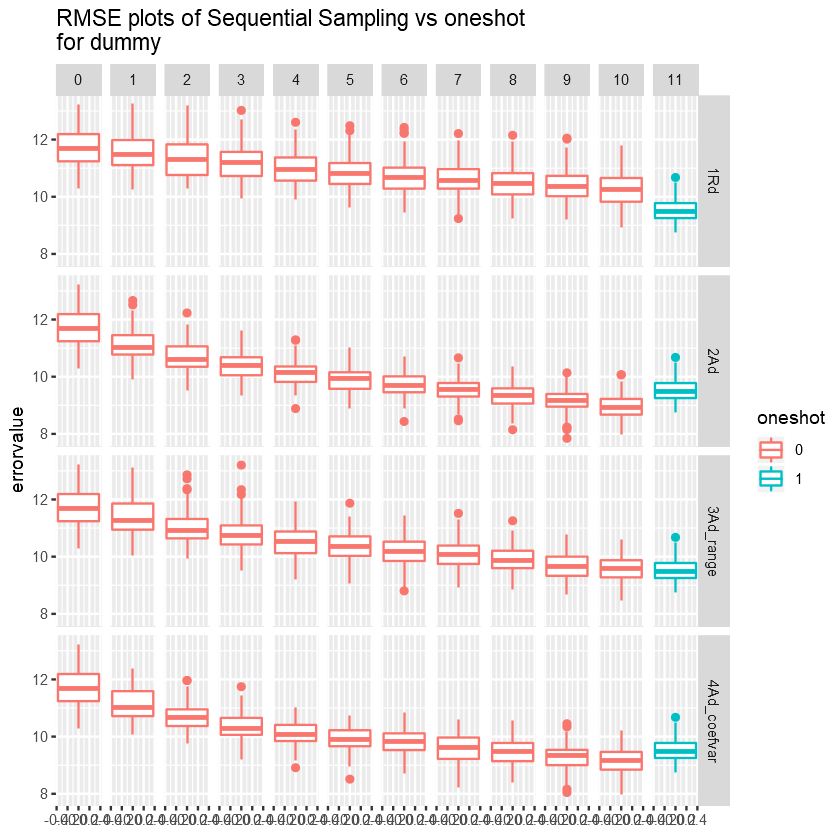

In [101]:
rmse_graph_molten_data.2 = rbind(data.table(performance_molten_Ad_seq.2[errortype == "rmse"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.2[errortype == "rmse"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.2[errortype == "rmse"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.2[errortype == "rmse"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_rmse_graph_molten_data.2 = rmse_graph_molten_data.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]


ggplot(test_ave_rmse_graph_molten_data.2, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

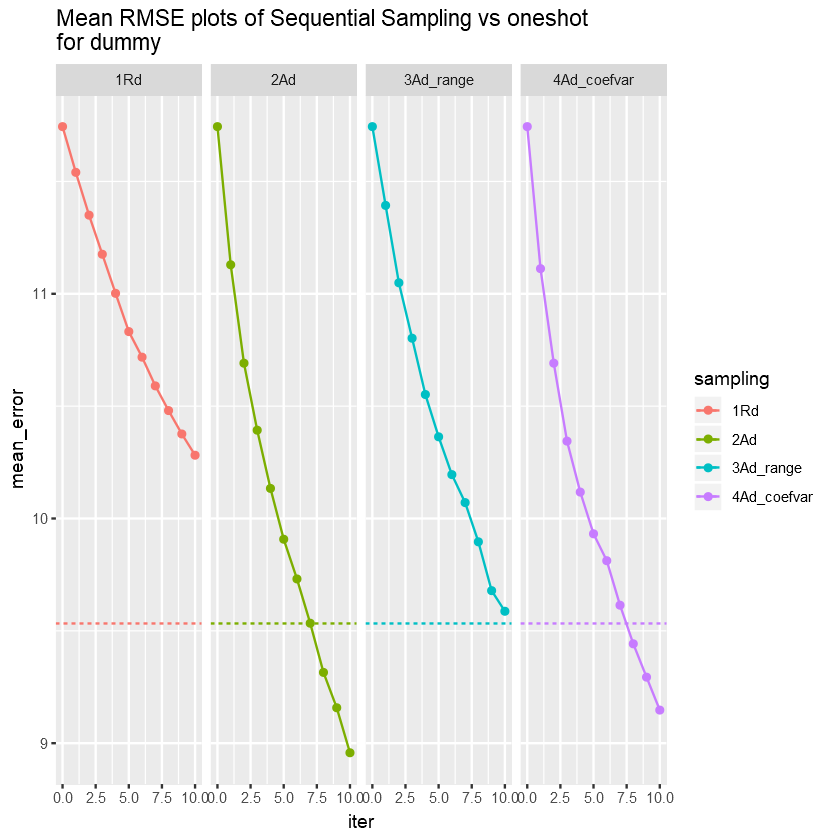

In [102]:
mean_rmse.2 = test_ave_rmse_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mean_rmse.2[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mean_rmse.2[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mean_rmse.2[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
 ggtitle(paste0("Mean RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

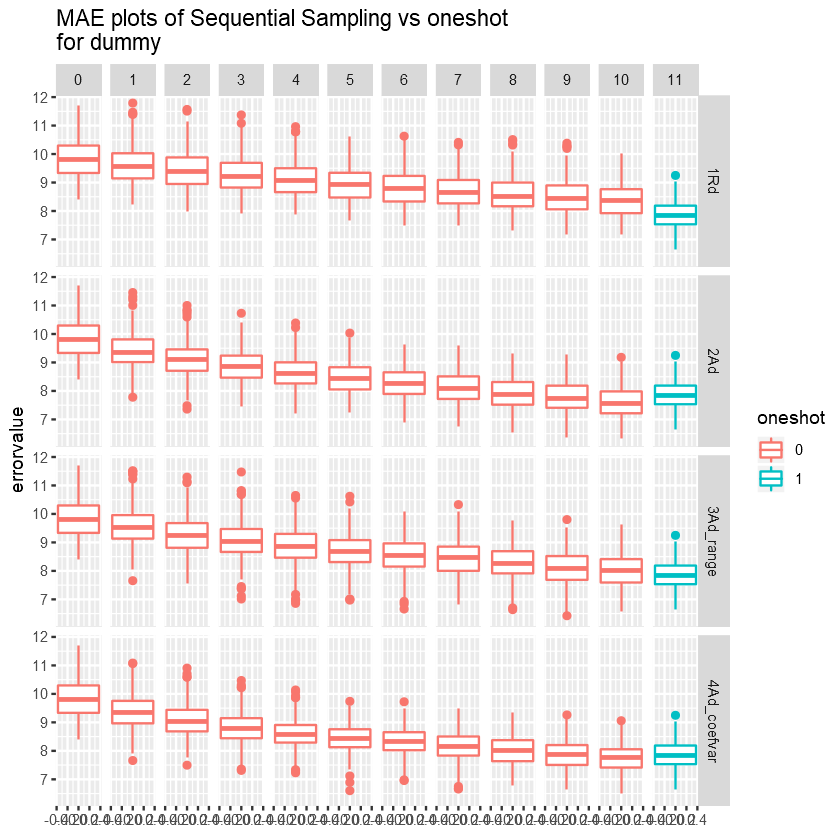

In [103]:
mae_graph_molten_data.2 = rbind(data.table(performance_molten_Ad_seq.2[errortype == "mae"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.2[errortype == "mae"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.2[errortype == "mae"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.2[errortype == "mae"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mae",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_mae_graph_molten_data.2 = mae_graph_molten_data.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]


ggplot(mae_graph_molten_data.2, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

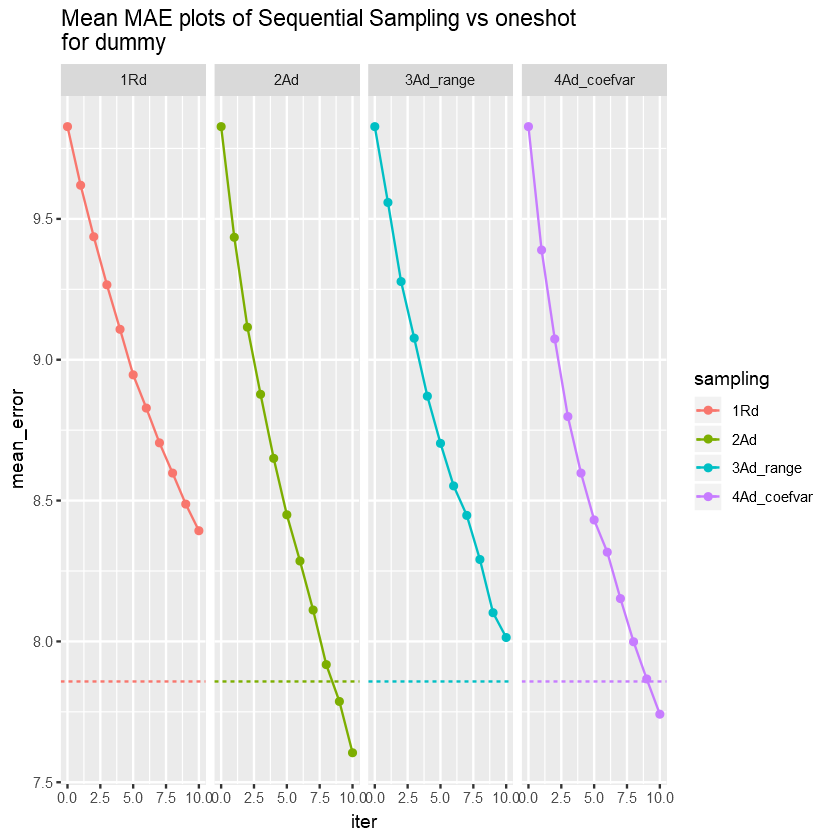

In [104]:
mae_rmse.2 = test_ave_mae_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mae_rmse.2[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mae_rmse.2[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mae_rmse.2[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

In [105]:
mape_graph_molten_data.2 = rbind(data.table(performance_molten_Ad_seq.2[errortype == "mape"], sampling = "2Ad", oneshot = "0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2Ad",oneshot="1")
                              ,data.table(performance_molten_Ad_range_seq.2[errortype == "mape"], sampling = "3Ad_range",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "3Ad_range",oneshot="1")
                              ,data.table(performance_molten_Ad_coefvar_seq.2[errortype == "mape"], sampling = "4Ad_coefvar",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter = 11,size,seed,rep,errortype,errorvalue)], sampling = "4Ad_coefvar",oneshot="1")
                              ,data.table(performance_molten_Rd_seq.2[errortype == "mape"], sampling = "1Rd",oneshot="0")
                              ,data.table(performance_molten_oneshot.2[errortype == "mape",.(iter =11,size,seed,rep,errortype,errorvalue)], sampling = "1Rd",oneshot="1")
                             )
test_ave_mape_graph_molten_data.2 = mape_graph_molten_data.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

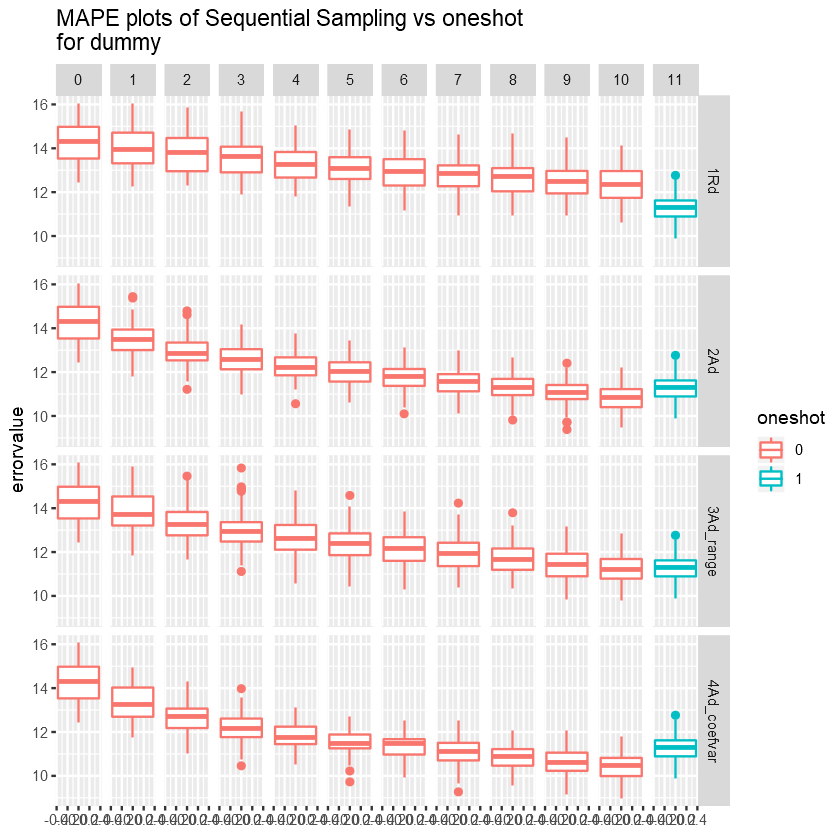

In [106]:

ggplot(test_ave_mape_graph_molten_data.2, aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("MAPE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

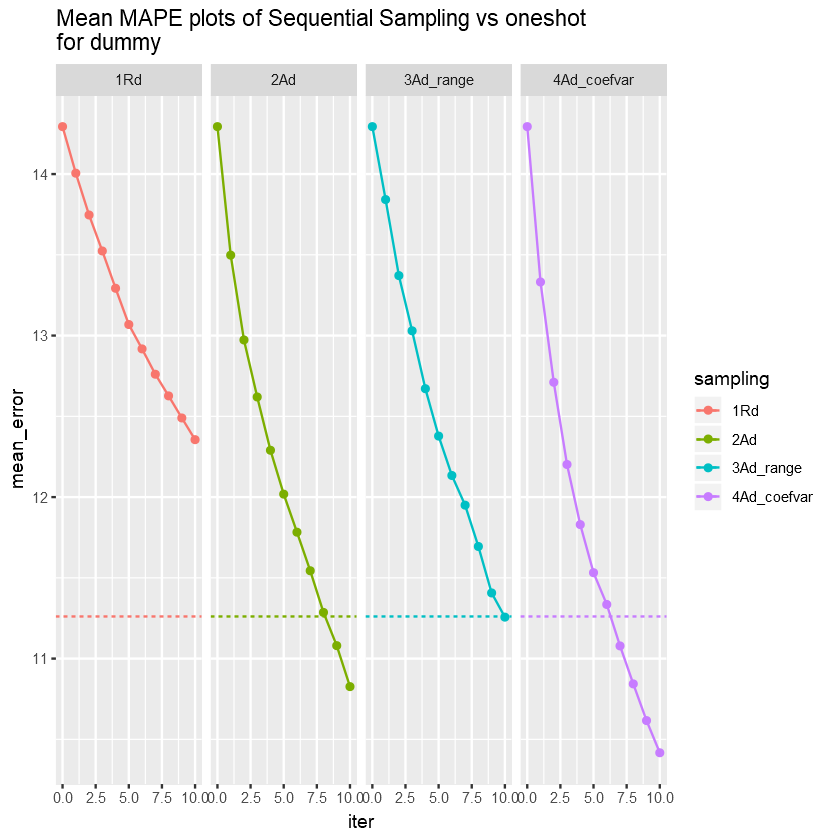

In [107]:
mape_rmse.2 = test_ave_mape_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,sampling,oneshot)]
ggplot(mape_rmse.2[iter != 11], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = mape_rmse.2[iter != 11], aes(x = iter ,y = mean_error)) +
        geom_hline( data = mape_rmse.2[iter == 11], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(~sampling) +
    ggtitle(paste0("Mean MAPE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

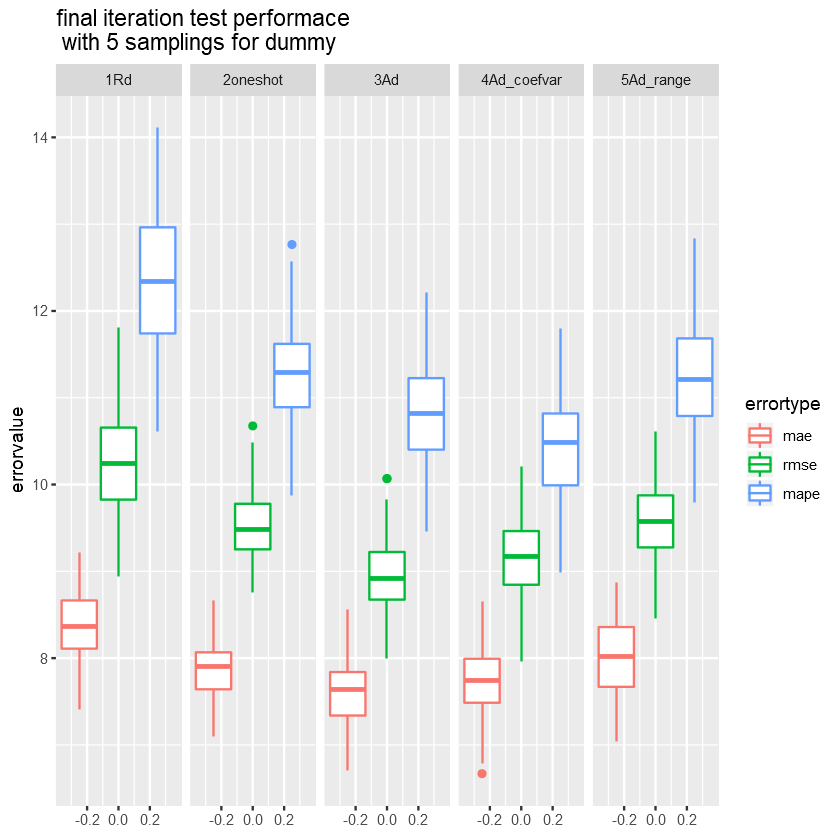

In [108]:
all_range_bxp.2 = ggplot(data = rbind(data.table(test_ave_performance_molten_Ad_range_seq.2[iter == 10], sampling = "5Ad_range")
                                     ,data.table(test_ave_performance_molten_Ad_coefvar_seq.2[iter == 10], sampling = "4Ad_coefvar")
                                     ,data.table(test_ave_performance_molten_Ad_seq.2[iter == 10], sampling = "3Ad")
                                     ,data.table(test_ave_performance_molten_Rd_seq.2[iter == 10], sampling = "1Rd")
                                     ,data.table(test_ave_performance_molten_oneshot.2, sampling = "2oneshot"))
                    , aes( y = errorvalue, group=errortype, col=errortype)) +
                    facet_wrap(~sampling, ncol = 5) +
                    geom_boxplot(aes(colour = errortype)) +
                    ggtitle(paste0("final iteration test performace","\n"," with 5 samplings for ",model.type.2))
                    
all_range_bxp.2

## Test Size Comparison

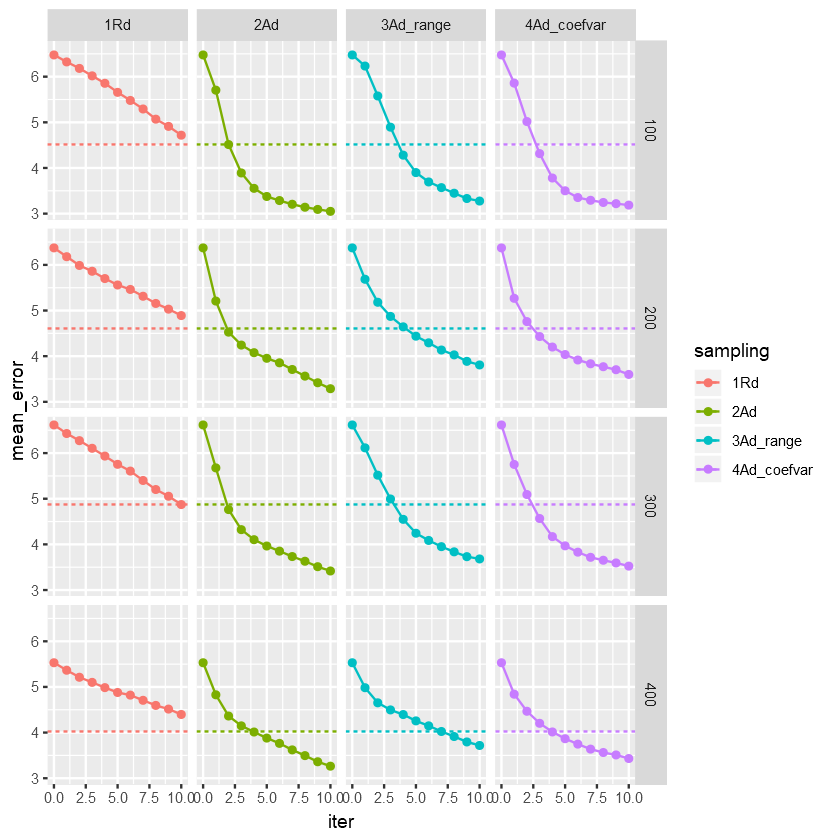

In [123]:
graph.rmse_graph_molten_data.1 = rmse_graph_molten_data.1[,.(mean_error = mean(errorvalue)),.(iter,errortype,size,sampling,oneshot)]

ggplot(graph.rmse_graph_molten_data.1[iter != 11 ], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = graph.rmse_graph_molten_data.1[iter != 11 ], aes(x = iter ,y = mean_error)) +
        geom_hline( data = graph.rmse_graph_molten_data.1[iter == 11 ], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(size ~sampling)# +
  #  ggtitle(paste0("Mean MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

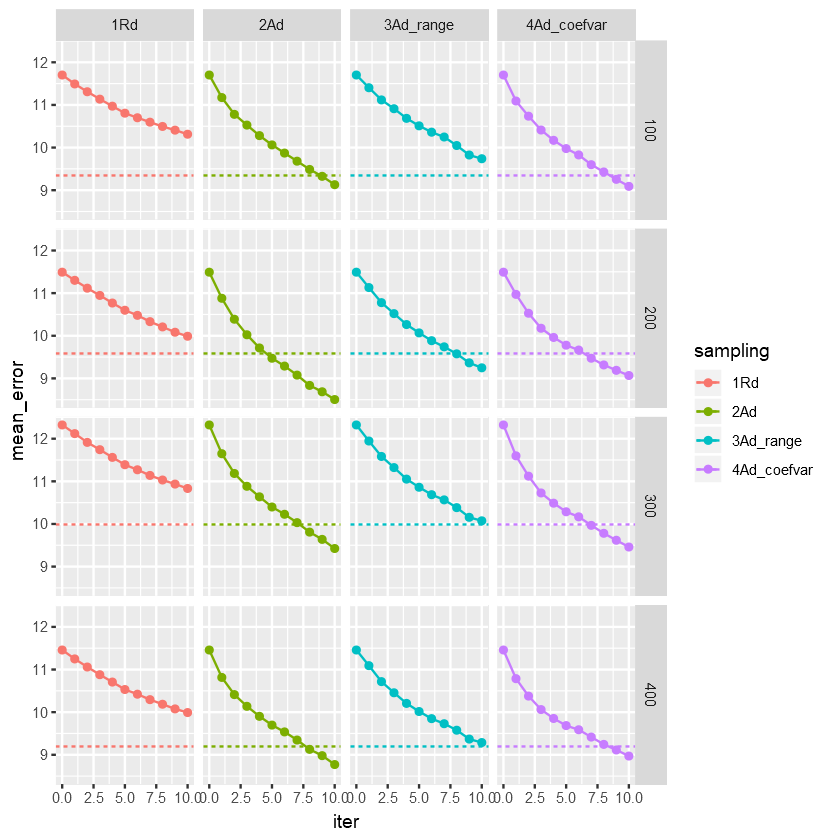

In [122]:
graph.rmse_graph_molten_data.2 = rmse_graph_molten_data.2[,.(mean_error = mean(errorvalue)),.(iter,errortype,size,sampling,oneshot)]

ggplot(graph.rmse_graph_molten_data.2[iter != 11 ], aes(x = iter ,y = mean_error, col = sampling)) + 
        geom_line() +
        geom_point(data = graph.rmse_graph_molten_data.2[iter != 11 ], aes(x = iter ,y = mean_error)) +
        geom_hline( data = graph.rmse_graph_molten_data.2[iter == 11 ], aes( yintercept = mean_error, col = sampling), linetype = "dashed") +
        facet_grid(size ~sampling)# +
  #  ggtitle(paste0("Mean MAE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))